In [2491]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import chi2
from wordcloud import WordCloud
from sklearn.utils import shuffle
from scipy import stats

In [2492]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sunmodza\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7


In [2493]:
ALPHA = 0.05

In [2494]:
!ls C:\Users\sunmodza\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2495]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable


In [2496]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data Loading

In [2497]:
df = pd.read_csv(path+"\movies_metadata.csv")

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\3710841025.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+"\movies_metadata.csv")


In [2498]:
df_keyword = pd.read_csv(path+"\keywords.csv")

In [2499]:
df_credit = pd.read_csv(path+"\credits.csv")


## Dataframe detail

## Main DF

In [2500]:
df.head(5)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [2501]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [2502]:
df.describe()

revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000

In [2503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

## Keyword DF

In [2504]:
df_keyword.head(5)

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [2505]:
df_keyword.columns

Index(['id', 'keywords'], dtype='object')

In [2506]:
df_keyword.describe()

id
count   46419.000000
mean   109769.951873
std    113045.780256
min         2.000000
25%     26810.500000
50%     61198.000000
75%    159908.500000
max    469172.000000

In [2507]:
df_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


# Data Preparing

## Missing Data

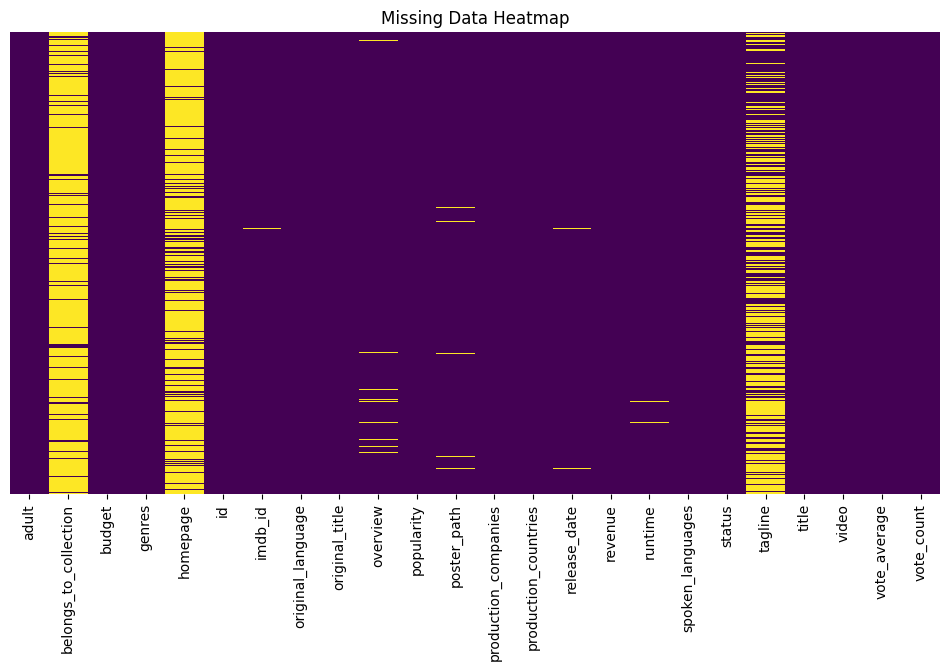

In [2508]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [2509]:
df.isnull().sum().rename("missing_values")

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
Name: missing_values, dtype: int64

In [2510]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [2511]:
# convert all column to numerical if possible
#df = df.apply(pd.to_numeric, errors='ignore')

In [2512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45466 non-null  object        
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  object        
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45461 non-null  object        
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [2513]:
df = df[pd.to_numeric(df['budget'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['popularity'], errors='coerce').notnull()]
df['budget'] = df['budget'].astype(float)
df['popularity'] = df['popularity'].astype(float)
df.head()

adult                              belongs_to_collection      budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1  False                                                NaN  65000000.0   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0.0   
3  False                                                NaN  16000000.0   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0.0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ...  release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...    1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...    1995-12-15   
2  A family wedding reignites the ancient feud be...  ...    1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...    1995-12-22   
4  Just when George Banks has recovered from his ...  ...    1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [2514]:
# deduplication id
df = df.drop_duplicates(subset=['id'])

## Making movie collection

In [2515]:
collect = []
for v in df.iterrows():
    v = v[1]
    try:
        bc = eval(str(v["belongs_to_collection"]))
        bc["movie_id"] = v["id"]
        bc.pop("id")
        bc.pop("poster_path")
        bc.pop("backdrop_path")
    except Exception as e:
        bc = {}
        continue
    collect.append(bc)

In [2516]:
collect_df = pd.DataFrame(collect)
collect_df

name movie_id
0               Toy Story Collection      862
1          Grumpy Old Men Collection    15602
2     Father of the Bride Collection    11862
3              James Bond Collection      710
4                   Balto Collection    21032
...                              ...      ...
4482         The Carry On Collection    24568
4483         The Carry On Collection    19307
4484         The Carry On Collection    21251
4485  DC Super Hero Girls Collection   460135
4486            Red Lotus Collection   182030

[4487 rows x 2 columns]

In [2517]:
# find how many number of movie sequal that come before them
# Count how many movies are in each collection
collection_counts = collect_df['name'].value_counts().reset_index()
collection_counts.columns = ['collection_name', 'movie_count']

# Display collections with more than one movie (sequels)
sequels_df = collection_counts[collection_counts['movie_count'] > 1]
print(f"There are {len(sequels_df)} movie collections with sequels")

# For each movie, find how many movies in its collection came before it
# First, merge release dates from main dataframe
collect_with_dates = collect_df.merge(df[['id', 'release_date']], 
                                     left_on='movie_id', 
                                     right_on='id', 
                                     how='left')

# Group by collection name and count movies released before each movie
movies_before = []
for name, group in collect_with_dates.groupby('name'):
    # Convert release_date to datetime
    group['release_date'] = pd.to_datetime(group['release_date'], errors='coerce')
    # Sort by release date
    group = group.sort_values('release_date')
    
    # For each movie in the collection, count how many came before it
    for i, row in enumerate(group.itertuples()):
        movies_before.append({
            'movie_id': row.movie_id,
            'collection_name': name,
            'movies_before': i,  # Index in sorted group = number of movies before
            'release_date': row.release_date
        })

# Create dataframe with results
sequels_count_df = pd.DataFrame(movies_before)
# drop release date
sequels_count_df.drop(columns=['release_date'], inplace=True)
sequels_count_df.head(10)

# add same collection count to all movie with collection
sequels_count_df["collection_count"] = sequels_count_df.groupby("collection_name")["movie_id"].transform("count")
sequels_count_df.head(10)


There are 1305 movie collections with sequels


movie_id                          collection_name  movies_before  \
0   117263                ... Has Fallen Collection              0   
1   267860                ... Has Fallen Collection              1   
2     1652                   00 Schneider Filmreihe              0   
3    19430                         08/15 Collection              0   
4    10035                     100 Girls Collection              0   
5    20648                     100 Girls Collection              1   
6    12230     101 Dalmatians (Animated) Collection              0   
7    13654     101 Dalmatians (Animated) Collection              1   
8    11674  101 Dalmatians (Live-Action) Collection              0   
9    10481  101 Dalmatians (Live-Action) Collection              1   

   collection_count  
0                 2  
1                 2  
2                 1  
3                 1  
4                 2  
5                 2  
6                 2  
7                 2  
8                 2  
9                 2

In [2518]:
# merge with df
df = df.merge(sequels_count_df, left_on="id", right_on="movie_id", how="left")
# where movies_before is null set 0
df["movies_before"] = df["movies_before"].fillna(0)
# where collection_count is null set 0
df["collection_count"] = df["collection_count"].fillna(1)


In [2519]:
df = df.drop(columns=["belongs_to_collection"])

## Making genres and id

In [2520]:
df["genres"],df["id"]

(0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
 1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
 2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
 3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
 4                           [{'id': 35, 'name': 'Comedy'}]
                                ...                        
 45425    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
 45426                        [{'id': 18, 'name': 'Drama'}]
 45427    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
 45428                                                   []
 45429                                                   []
 Name: genres, Length: 45430, dtype: object,
 0           862
 1          8844
 2         15602
 3         31357
 4         11862
           ...  
 45425    439050
 45426    111109
 45427     67758
 45428    227506
 45429    461257
 Name: id, Length: 45430, dtype: object)

In [2521]:
genres_data = []
for v in df.iterrows():
    v = v[1]
    genre = eval(v["genres"])
    for item in genre:
        item["movie_id"] = v["id"]
        item.pop("id")
        genres_data.append(item)
df_genre = pd.DataFrame(genres_data)
df.drop(columns=["genres","imdb_id"])
df_genre

name movie_id
0      Animation      862
1         Comedy      862
2         Family      862
3      Adventure     8844
4        Fantasy     8844
...          ...      ...
91001     Family   439050
91002      Drama   111109
91003     Action    67758
91004      Drama    67758
91005   Thriller    67758

[91006 rows x 2 columns]

In [2522]:
df_genre["name"].value_counts().reset_index()

name  count
0             Drama  20243
1            Comedy  13176
2          Thriller   7618
3           Romance   6730
4            Action   6590
5            Horror   4670
6             Crime   4304
7       Documentary   3930
8         Adventure   3490
9   Science Fiction   3042
10           Family   2767
11          Mystery   2464
12          Fantasy   2309
13        Animation   1930
14          Foreign   1619
15            Music   1597
16          History   1398
17              War   1322
18          Western   1042
19         TV Movie    765

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'History'),
  Text(12, 0, 'Science Fiction'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Foreign'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Western'),
  Text(19, 0, 'TV Movie')])

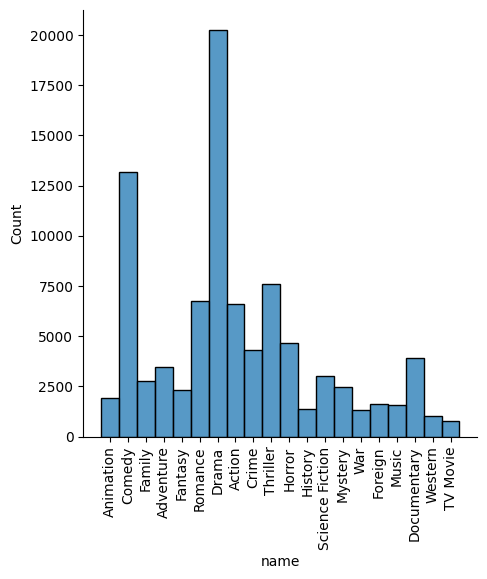

In [2523]:
sns.displot(df_genre["name"])
plt.xticks(rotation=90)

## Making production company df

In [2524]:
prod_comp = []
for v in df.iterrows():
    v = v[1]
    try:
        bc = eval(str(v["production_companies"]))
        for item in bc:
            item["movie_id"] = v["id"]
            item.pop("id")
            prod_comp.append(item)
    except Exception as e:
        bc = {}
        continue
    #print(bc)
    #prod_comp.append(bc)

df_prod_comp = pd.DataFrame(prod_comp)
df_prod_comp

name movie_id
0            Pixar Animation Studios      862
1                   TriStar Pictures     8844
2                       Teitler Film     8844
3          Interscope Communications     8844
4                       Warner Bros.    15602
...                              ...      ...
70459    20th Century Fox Television    30840
70460  CanWest Global Communications    30840
70461                    Sine Olivia   111109
70462        American World Pictures    67758
70463                      Yermoliev   227506

[70464 rows x 2 columns]

In [2525]:
df_prod_comp["name"].value_counts().head(100)

name
Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1074
Paramount Pictures                        1001
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
                                          ... 
Lenfilm                                     52
Daiei Studios                               51
Arte                                        51
Golden Harvest Company                      50
Davis Entertainment                         50
Name: count, Length: 100, dtype: int64

## Movie Keyword DF

In [2526]:
df_keyword

id                                           keywords
0         862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2       15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3       31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4       11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
...       ...                                                ...
46414  439050             [{'id': 10703, 'name': 'tragic love'}]
46415  111109  [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416   67758                                                 []
46417  227506                                                 []
46418  461257                                                 []

[46419 rows x 2 columns]

In [2527]:
kws = []
for v in df_keyword.iterrows():
    v = v[1]
    try:
        bc = eval(str(v["keywords"]))
        for item in bc:
            item["movie_id"] = v["id"]
            item.pop("id")
            kws.append(item)
    except Exception as e:
        bc = {}
        continue

df_keyword = pd.DataFrame(kws)
df_keyword

name  movie_id
0           jealousy       862
1                toy       862
2                boy       862
3         friendship       862
4            friends       862
...              ...       ...
158675  mockumentary    289923
158676   tragic love    439050
158677        artist    111109
158678          play    111109
158679         pinoy    111109

[158680 rows x 2 columns]

# Credit DF

In [2528]:
df_credit.head(10)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   
5  [{'cast_id': 25, 'character': 'Lt. Vincent Han...   
6  [{'cast_id': 1, 'character': 'Linus Larrabee',...   
7  [{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...   
8  [{'cast_id': 1, 'character': 'Darren Francis T...   
9  [{'cast_id': 1, 'character': 'James Bond', 'cr...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  
5  [{'credit_id': '52fe4292c3a36847f802916d', 'de...    949  
6  [{'credit_id': '52fe44959251416c75039da9', 'de...  11860  
7  [{'credit_id': '52fe46bdc3a36847f810f797', 'de...  45325  
8  [{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...   9091  
9  [{'credit_id': '52fe426ec3a36847f801e14b', 'de...    710

In [2529]:
print(df_credit.iloc[5]["cast"])

[{'cast_id': 25, 'character': 'Lt. Vincent Hanna', 'credit_id': '52fe4292c3a36847f80291f5', 'gender': 2, 'id': 1158, 'name': 'Al Pacino', 'order': 0, 'profile_path': '/ks7Ba8x9fJUlP9decBr6Dh5mThX.jpg'}, {'cast_id': 26, 'character': 'Neil McCauley', 'credit_id': '52fe4292c3a36847f80291f9', 'gender': 2, 'id': 380, 'name': 'Robert De Niro', 'order': 1, 'profile_path': '/lvTSwUcvJRLAJ2FB5qFaukel516.jpg'}, {'cast_id': 27, 'character': 'Chris Shiherlis', 'credit_id': '52fe4292c3a36847f80291fd', 'gender': 2, 'id': 5576, 'name': 'Val Kilmer', 'order': 2, 'profile_path': '/AlhPeiH8R4reMNGNQ9ag1FPbuW9.jpg'}, {'cast_id': 28, 'character': 'Nate', 'credit_id': '52fe4292c3a36847f8029201', 'gender': 2, 'id': 10127, 'name': 'Jon Voight', 'order': 3, 'profile_path': '/c7BvyqlvqDkfkFqSBUCiR21fvTh.jpg'}, {'cast_id': 29, 'character': 'Michael Cheritto', 'credit_id': '52fe4292c3a36847f8029205', 'gender': 2, 'id': 3197, 'name': 'Tom Sizemore', 'order': 4, 'profile_path': '/soINOuacuiThRb2LyPD4tTWve7C.jpg'},

In [2530]:
# Extract the first character from each cast member
cast_first_chars = []
for row in df_credit.iterrows():
    row_data = row[1]
    try:
        cast_data = eval(str(row_data["cast"]))
        if cast_data and len(cast_data) > 0:
            # Get only the first character from the cast list
            first_character = cast_data[0]
            first_character["movie_id"] = row_data["id"]
            cast_first_chars.append(first_character)
    except Exception as e:
        continue

# Create DataFrame with first characters only
df_cast_first = pd.DataFrame(cast_first_chars)
df_cast_first.head()


cast_id                  character                 credit_id  gender  \
0       14              Woody (voice)  52fe4284c3a36847f8024f95       2   
1        1               Alan Parrish  52fe44bfc3a36847f80a7c73       2   
2        2                Max Goldman  52fe466a9251416c75077a8d       2   
3        1  Savannah 'Vannah' Jackson  52fe44779251416c91011aad       1   
4        1               George Banks  52fe44959251416c75039eb9       2   

      id             name  order                      profile_path  movie_id  
0     31        Tom Hanks      0  /pQFoyx7rp09CJTAb932F2g8Nlho.jpg       862  
1   2157   Robin Williams      0  /sojtJyIV3lkUeThD7A2oHNm8183.jpg      8844  
2   6837   Walter Matthau      0  /xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg     15602  
3   8851  Whitney Houston      0  /69ouDnXnmklYPr4sMJXWKYz81AL.jpg     31357  
4  67773     Steve Martin      0  /rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg     11862

In [2531]:
df_cast_first = df_cast_first[["movie_id","gender","character","name"]]
df_cast_first.head()


movie_id  gender                  character             name
0       862       2              Woody (voice)        Tom Hanks
1      8844       2               Alan Parrish   Robin Williams
2     15602       2                Max Goldman   Walter Matthau
3     31357       1  Savannah 'Vannah' Jackson  Whitney Houston
4     11862       2               George Banks     Steve Martin

In [2532]:
# replace gender {1:woman,2:man,3:other}
df_cast_first["gender"] = df_cast_first["gender"].replace({1:"woman",2:"man",3:"other"})
df_cast_first = df_cast_first.rename({"name":"main_cast_name","gender":"main_cast_gender","character":"main_cast_character"},axis=1)
df_cast_first["movie_id"] = df_cast_first["movie_id"].astype(str)
df_cast_first.head()

# join with df
df_cast_first = df_cast_first.merge(df[["id","original_title","vote_average","vote_count","runtime","release_date","revenue","budget","movies_before","collection_count"]], left_on="movie_id", right_on="id")
df_cast_first.head()



movie_id main_cast_gender        main_cast_character   main_cast_name  \
0      862              man              Woody (voice)        Tom Hanks   
1     8844              man               Alan Parrish   Robin Williams   
2    15602              man                Max Goldman   Walter Matthau   
3    31357            woman  Savannah 'Vannah' Jackson  Whitney Houston   
4    11862              man               George Banks     Steve Martin   

      id               original_title  vote_average  vote_count  runtime  \
0    862                    Toy Story           7.7      5415.0     81.0   
1   8844                      Jumanji           6.9      2413.0    104.0   
2  15602             Grumpier Old Men           6.5        92.0    101.0   
3  31357            Waiting to Exhale           6.1        34.0    127.0   
4  11862  Father of the Bride Part II           5.7       173.0    106.0   

  release_date      revenue      budget  movies_before  collection_count  
0   1995-10-30  373554033.0  30000000.0            0.0               3.0  
1   1995-12-15  262797249.0  65000000.0            0.0               1.0  
2   1995-12-22          0.0         0.0            1.0               2.0  
3   1995-12-22   81452156.0  16000000.0            0.0               1.0  
4   1995-02-10   76578911.0         0.0            1.0               2.0

# EDA all DF (removed repeating group)

## 1. Main DF

In [2533]:
df.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'movie_id',
       'collection_name', 'movies_before', 'collection_count'],
      dtype='object')

In [2534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45430 entries, 0 to 45429
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45430 non-null  object        
 1   budget                45430 non-null  float64       
 2   genres                45430 non-null  object        
 3   homepage              7773 non-null   object        
 4   id                    45430 non-null  object        
 5   imdb_id               45413 non-null  object        
 6   original_language     45419 non-null  object        
 7   original_title        45430 non-null  object        
 8   overview              44476 non-null  object        
 9   popularity            45430 non-null  float64       
 10  poster_path           45047 non-null  object        
 11  production_companies  45430 non-null  object        
 12  production_countries  45430 non-null  object        
 13  release_date    

In [2535]:
df.head(5)

adult      budget                                             genres  \
0  False  30000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  False  65000000.0  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  False         0.0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  False  16000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4  False         0.0                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity  ...  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943  ...   
1  When siblings Judy and Peter discover an encha...   17.015539  ...   
2  A family wedding reignites the ancient feud be...   11.712900  ...   
3  Cheated on, mistreated and stepped on, the wom...    3.859495  ...   
4  Just when George Banks has recovered from his ...    8.387519  ...   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count movie_id  \
0                    Toy Story  False           7.7      5415.0      862   
1                      Jumanji  False           6.9      2413.0      NaN   
2             Grumpier Old Men  False           6.5        92.0    15602   
3            Waiting to Exhale  False           6.1        34.0      NaN   
4  Father of the Bride Part II  False           5.7       173.0    11862   

                  collection_name movies_before collection_count  
0            Toy Story Collection           0.0              3.0  
1                             NaN           0.0              1.0  
2       Grumpy Old Men Collection           1.0              2.0  
3                             NaN           0.0              1.0  
4  Father of the Bride Collection           1.0              2.0  

[5 rows x 27 columns]

### Budget Distribution

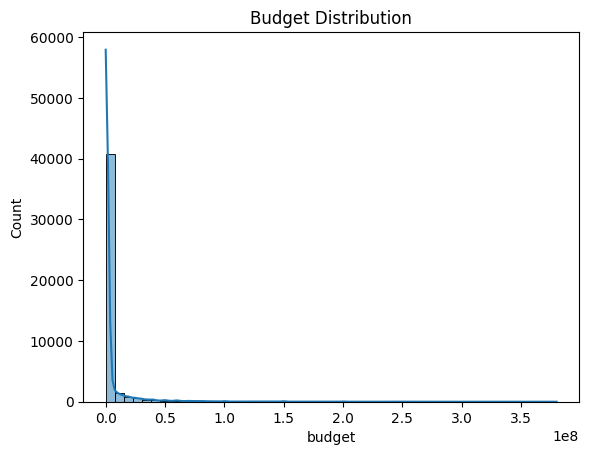

In [2536]:
sns.histplot(df['budget'], bins=50, kde=True)
plt.title('Budget Distribution')
plt.show()

### Revenue Distribution

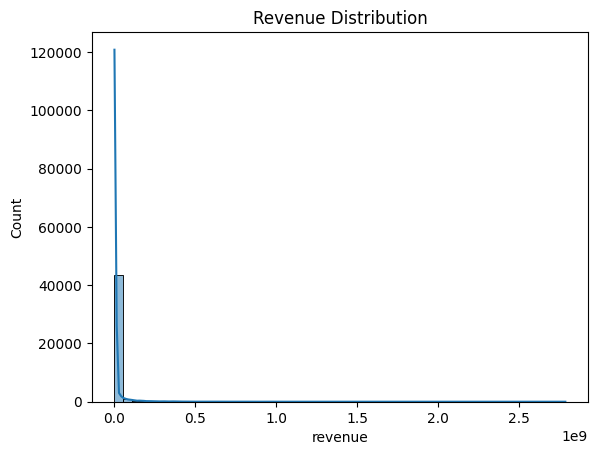

In [2537]:
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title('Revenue Distribution')
plt.show()

### Top 10 Movie Languages

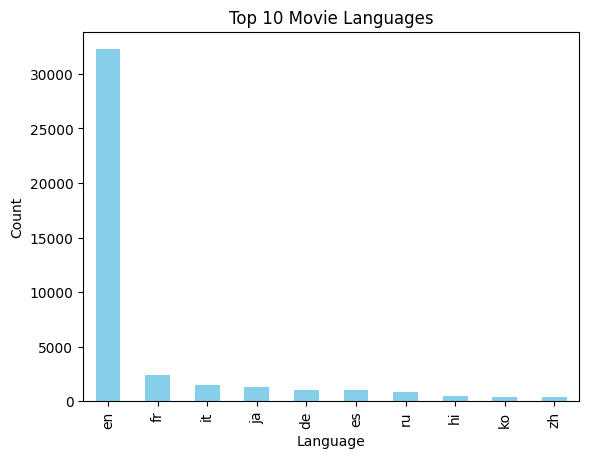

In [2538]:
df['original_language'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

### Distribution of Runtime

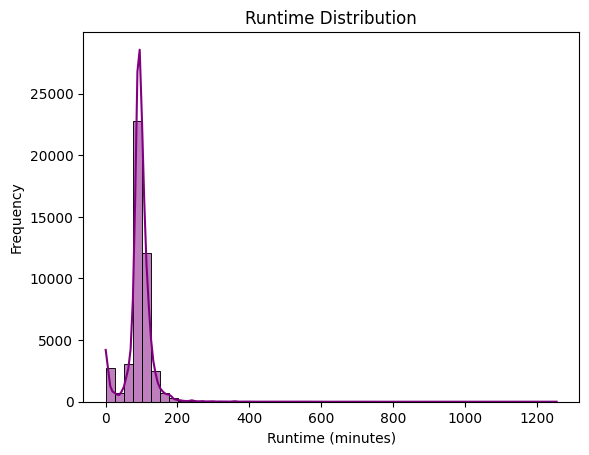

In [2539]:
sns.histplot(df['runtime'].dropna(), bins=50, kde=True, color='purple')
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


### Top 10 Longest Movies

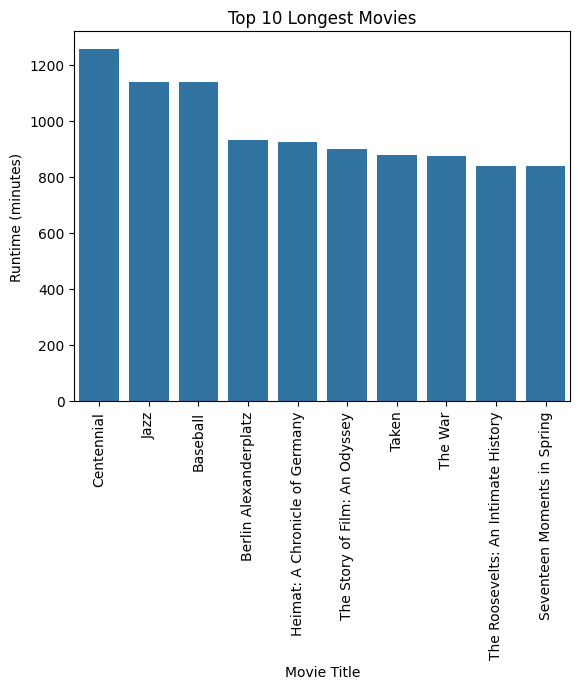

In [2540]:
top_10_longest = df.nlargest(10, 'runtime')

sns.barplot(x='title', y='runtime', data=top_10_longest)
plt.xticks(rotation=90)
plt.title('Top 10 Longest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Runtime (minutes)')
plt.show()


### Vote

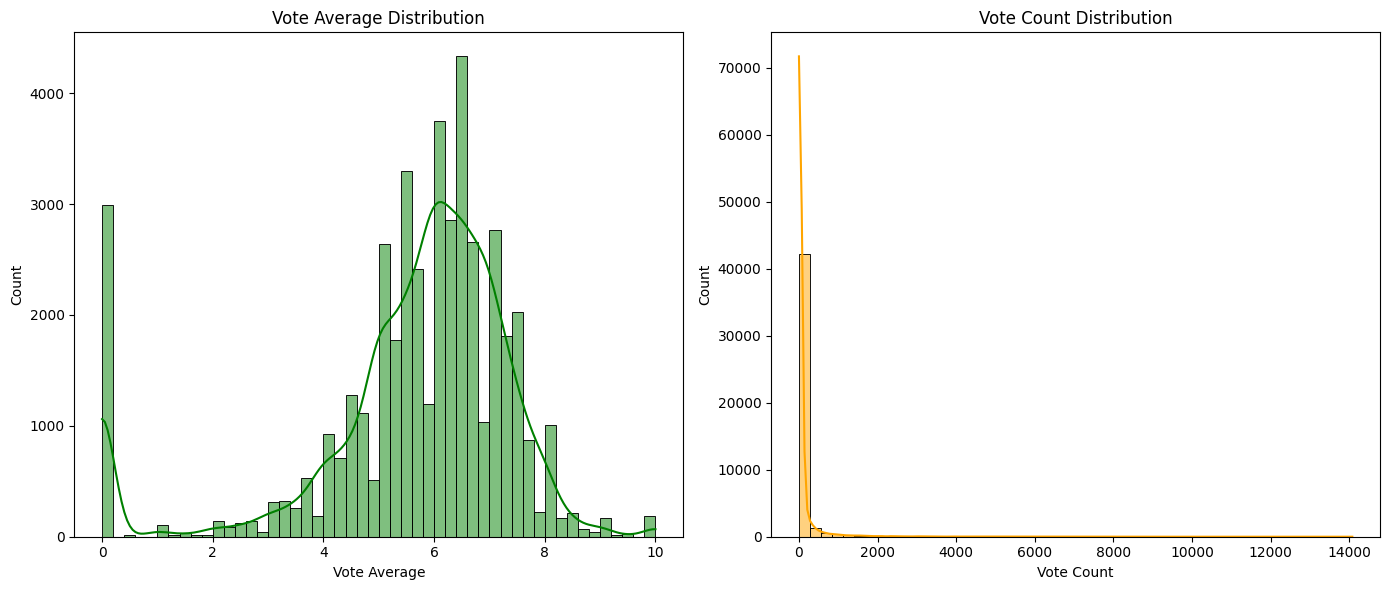

In [2541]:
# Explore vote_average and vote_count
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.histplot(df['vote_average'], bins=50, kde=True, color='green')
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')

plt.subplot(1, 2, 2)
sns.histplot(df['vote_count'], bins=50, kde=True, color='orange')
plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')

plt.tight_layout()
plt.show()

### Budger vs Revenue

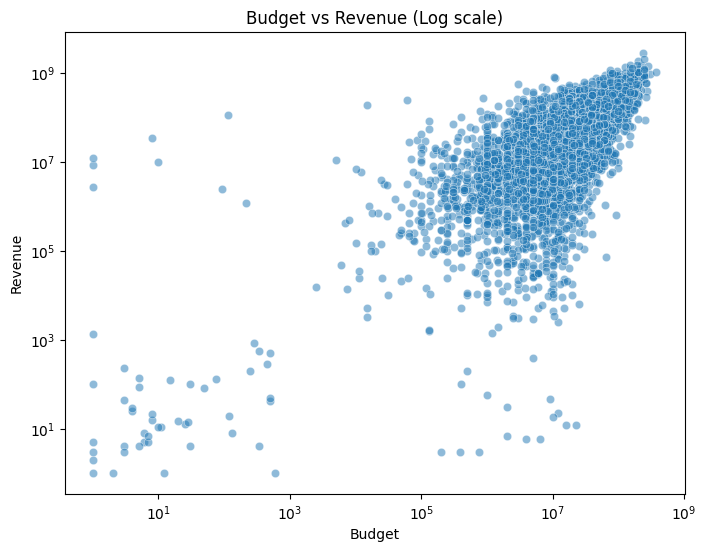

In [2542]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.title('Budget vs Revenue (Log scale)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

## 2. Genre df

In [2543]:
df.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'movie_id',
       'collection_name', 'movies_before', 'collection_count'],
      dtype='object')

In [2544]:
df_genre.head(5)

name movie_id
0  Animation      862
1     Comedy      862
2     Family      862
3  Adventure     8844
4    Fantasy     8844

In [2545]:
df.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'movie_id',
       'collection_name', 'movies_before', 'collection_count'],
      dtype='object')

In [2546]:
# join with df
df_genre_join = df_genre.merge(df[["id",'original_title',"vote_average","vote_count","runtime","release_date","revenue","budget","movies_before","collection_count"]], left_on="movie_id", right_on="id")
# remove duplicate column name


df_genre_join.head(5)


name movie_id    id original_title  vote_average  vote_count  runtime  \
0  Animation      862   862      Toy Story           7.7      5415.0     81.0   
1     Comedy      862   862      Toy Story           7.7      5415.0     81.0   
2     Family      862   862      Toy Story           7.7      5415.0     81.0   
3  Adventure     8844  8844        Jumanji           6.9      2413.0    104.0   
4    Fantasy     8844  8844        Jumanji           6.9      2413.0    104.0   

  release_date      revenue      budget  movies_before  collection_count  
0   1995-10-30  373554033.0  30000000.0            0.0               3.0  
1   1995-10-30  373554033.0  30000000.0            0.0               3.0  
2   1995-10-30  373554033.0  30000000.0            0.0               3.0  
3   1995-12-15  262797249.0  65000000.0            0.0               1.0  
4   1995-12-15  262797249.0  65000000.0            0.0               1.0

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\1283504276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get

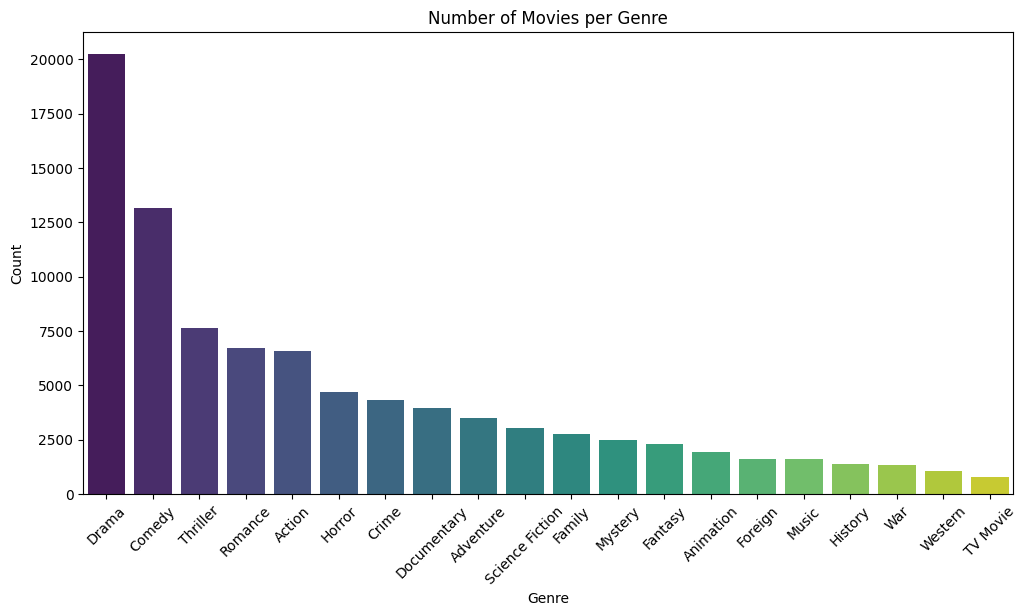

In [2547]:
plt.figure(figsize=(12,6))
genre_counts = df_genre_join['name'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\1702495383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name', y='vote_average', data=df_genre_join, palette='Set3')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python31

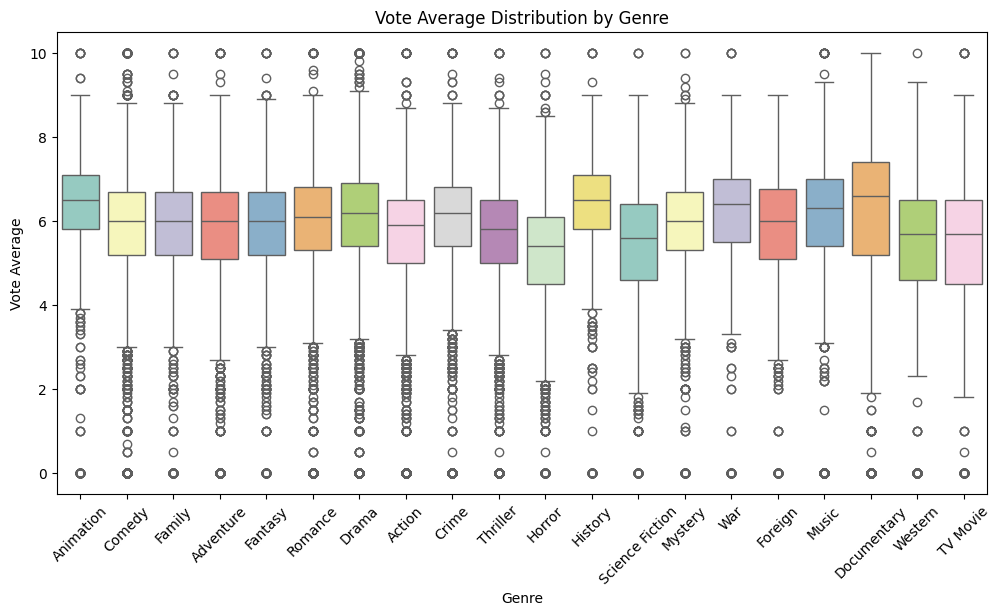

In [2548]:
plt.figure(figsize=(12,6))
sns.boxplot(x='name', y='vote_average', data=df_genre_join, palette='Set3')
plt.title('Vote Average Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=45)
plt.show()


### Budget vs Revenue, colored by Genre

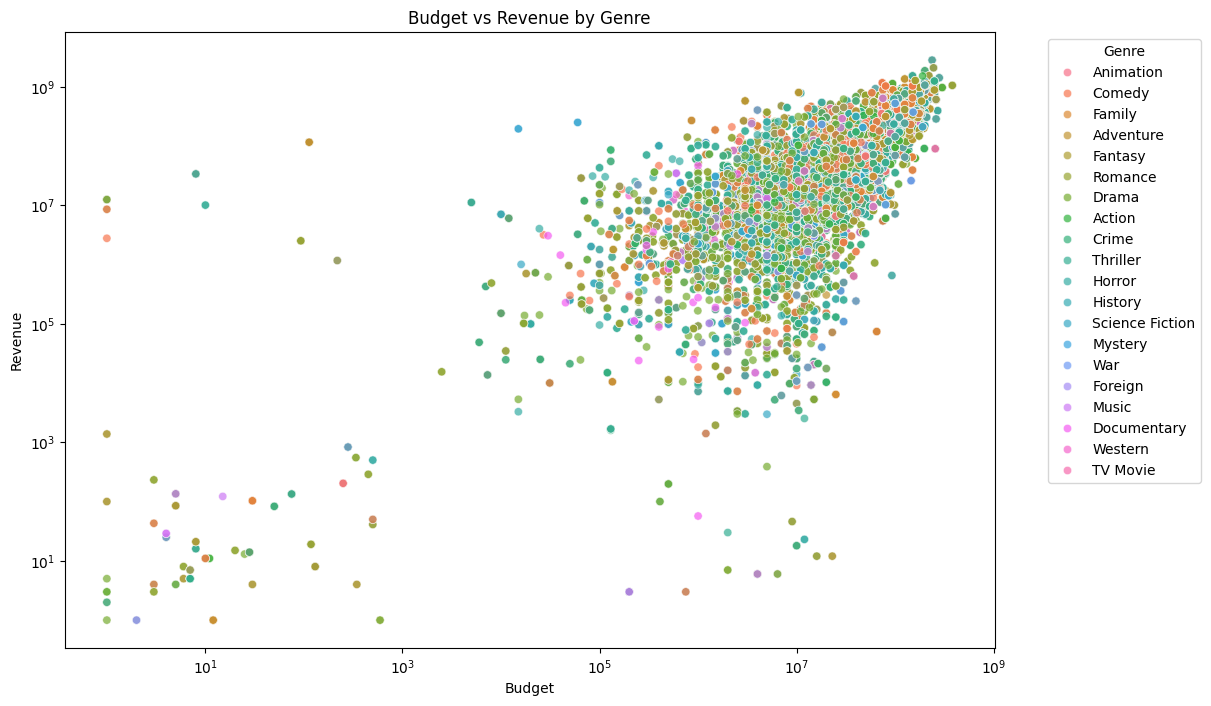

In [2549]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='budget', y='revenue', hue='name', data=df_genre_join, alpha=0.7)
plt.title('Budget vs Revenue by Genre')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Average Revenue by Genre

In [2550]:
avg_metrics = df_genre_join.groupby('name').agg({
    'revenue': 'mean',
    'budget': 'mean',
    'vote_average': 'mean',
    'vote_count': 'mean'
}).reset_index()

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\1116832213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='revenue', data=avg_metrics, palette='coolwarm')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gr

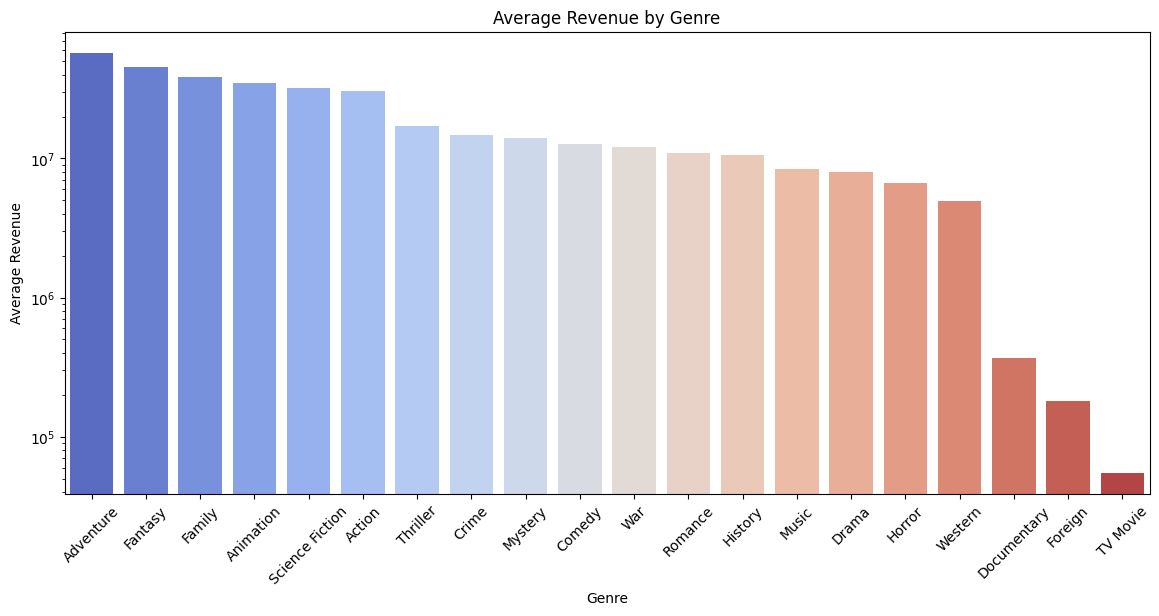

In [2551]:
plt.figure(figsize=(14,6))
avg_metrics = avg_metrics.sort_values(by='revenue', ascending=False)
sns.barplot(x='name', y='revenue', data=avg_metrics, palette='coolwarm')
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

### Average Budget by Genre

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\2175570235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='budget', data=avg_metrics, palette='coolwarm')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

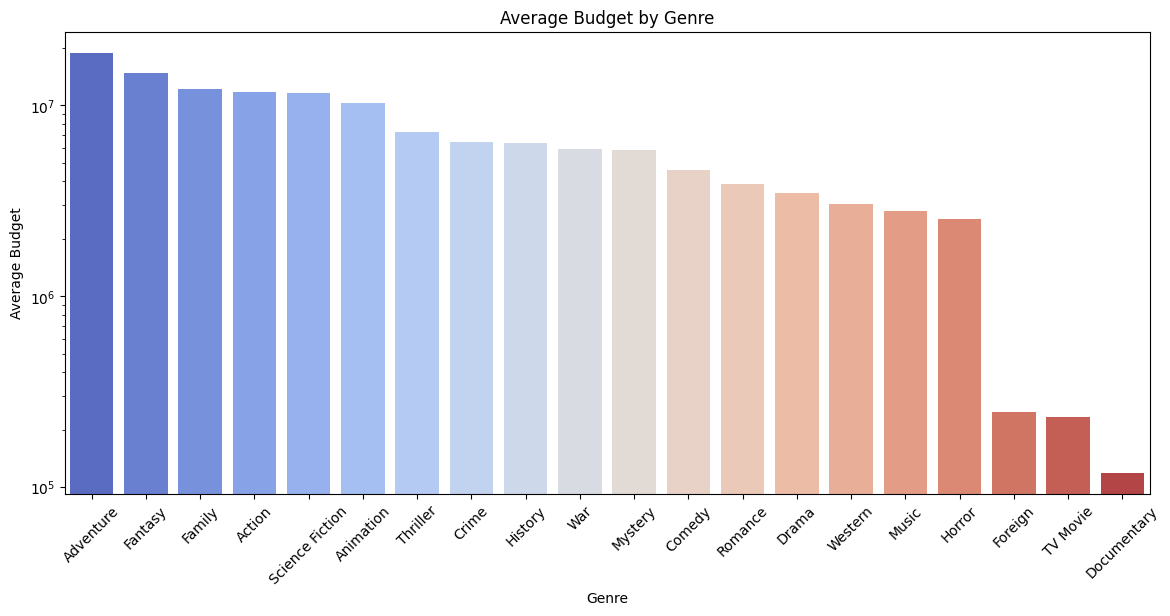

In [2552]:
plt.figure(figsize=(14,6))
avg_metrics = avg_metrics.sort_values(by='budget', ascending=False)
sns.barplot(x='name', y='budget', data=avg_metrics, palette='coolwarm')
plt.title('Average Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Budget')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

### Average Vote Average by Genre

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\3035195308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='vote_average', data=avg_metrics, palette='coolwarm')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

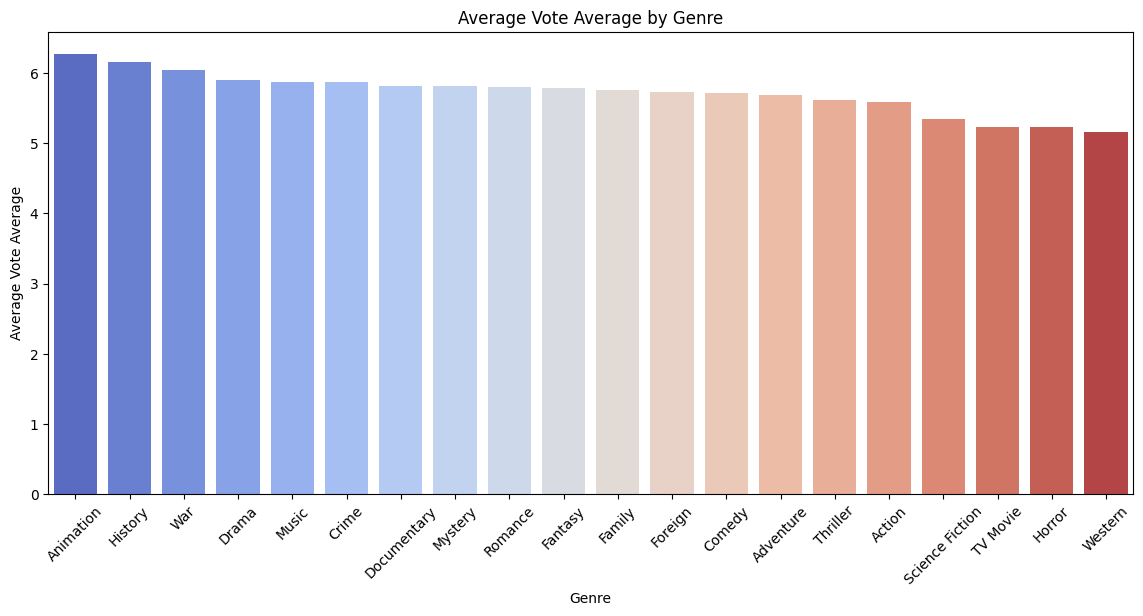

In [2553]:
plt.figure(figsize=(14,6))
avg_metrics = avg_metrics.sort_values(by='vote_average', ascending=False)
sns.barplot(x='name', y='vote_average', data=avg_metrics, palette='coolwarm')
plt.title('Average Vote Average by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Vote Average')
plt.xticks(rotation=45)
plt.show()

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\1853066829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_join_p ['release_year_bin'] = ((df_genre_join_p ['release_year'] - 2000) // 2) * 2 + 2000
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get

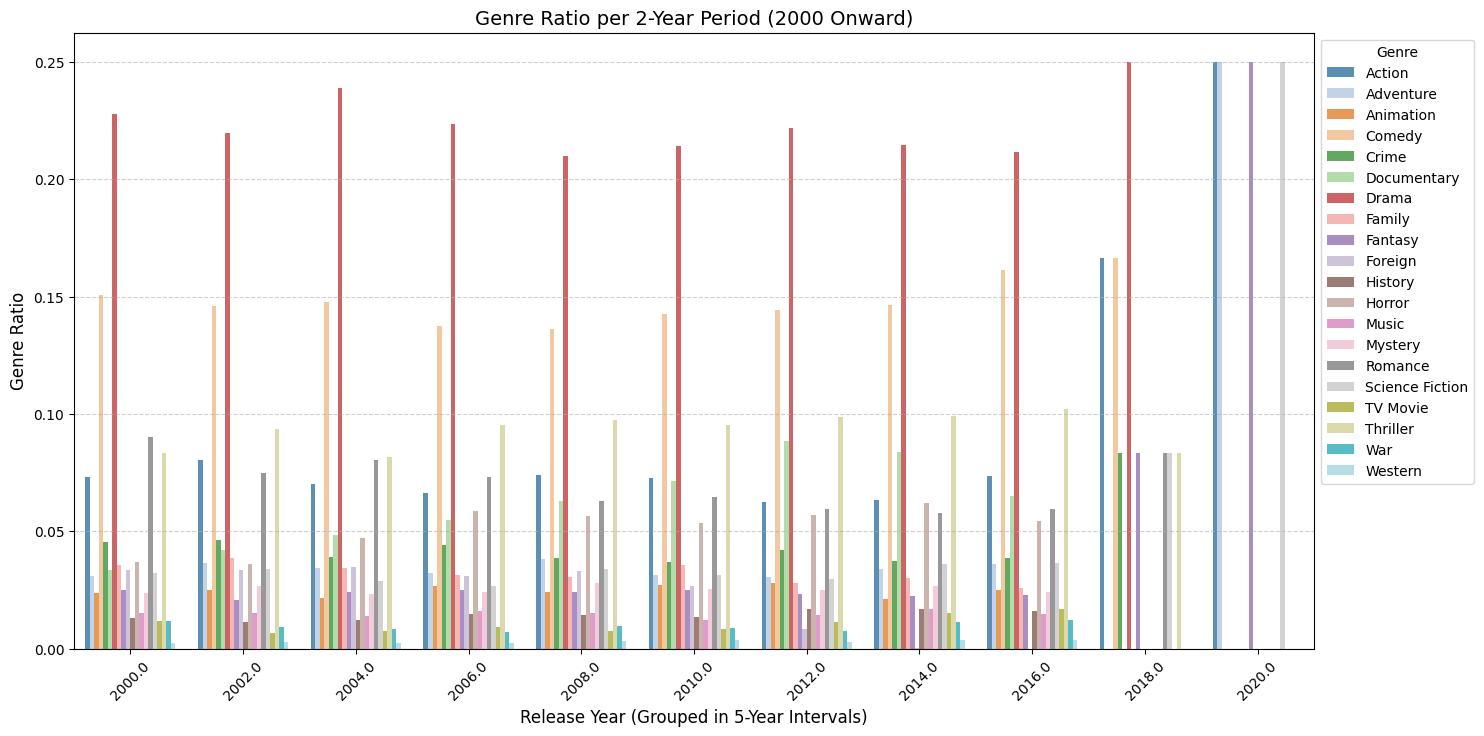

In [2554]:
# Convert release_date to year
df_genre_join['release_year'] = df_genre_join['release_date'].dt.year

# Filter data from 1980 onward
df_genre_join_p = df_genre_join[df_genre_join['release_year'] >= 2000]

# Create 5-year bins starting from 1980
df_genre_join_p ['release_year_bin'] = ((df_genre_join_p ['release_year'] - 2000) // 2) * 2 + 2000

# Aggregate counts per 5-year bin
df_binned = df_genre_join_p .groupby(['release_year_bin', 'name']).size().reset_index(name='count')

# Calculate total count per 5-year bin
df_total = df_binned.groupby('release_year_bin')['count'].sum().reset_index(name='total_count')

# Merge to calculate ratio
df_binned = df_binned.merge(df_total, on='release_year_bin')
df_binned['ratio'] = df_binned['count'] / df_binned['total_count']

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(
    x='release_year_bin',
    y='ratio',
    hue='name',
    data=df_binned,
    palette='tab20',
    alpha=0.8
)

plt.title('Genre Ratio per 2-Year Period (2000 Onward)', fontsize=14)
plt.xlabel('Release Year (Grouped in 5-Year Intervals)', fontsize=12)
plt.ylabel('Genre Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


In [2555]:
# Ensure release_date is converted to datetime and create a release_year column
df_genre_join['release_year'] = df_genre_join['release_date'].dt.year

# Group by release_year and genre, then count the number of movies
genre_year_counts = df_genre_join.groupby(['release_year', 'name']).size().reset_index(name='movie_count')

# For each year, select the genre with the highest movie count
most_popular_genre = genre_year_counts.sort_values(['release_year', 'movie_count'], ascending=[True, False]) \
                                        .drop_duplicates('release_year') \
                                        .sort_values('release_year')

# Display the table of the most popular genre for each year
most_popular_genre.reset_index(drop=True, inplace=True)
most_popular_genre.tail(10)

release_year    name  movie_count
125        2010.0   Drama          645
126        2011.0   Drama          712
127        2012.0   Drama          651
128        2013.0   Drama          759
129        2014.0   Drama          785
130        2015.0   Drama          769
131        2016.0   Drama          649
132        2017.0   Drama          205
133        2018.0   Drama            3
134        2020.0  Action            1

## 3. movie collection dF

In [2556]:
collect_df.head(5)

name movie_id
0            Toy Story Collection      862
1       Grumpy Old Men Collection    15602
2  Father of the Bride Collection    11862
3           James Bond Collection      710
4                Balto Collection    21032

In [2557]:
df.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'movie_id',
       'collection_name', 'movies_before', 'collection_count'],
      dtype='object')

In [2558]:
# merge
collect_df_join = collect_df.merge(df[["id",'original_title',"vote_average","vote_count","runtime","release_date","revenue","budget","movies_before","collection_count"]], left_on="movie_id", right_on="id")
collect_df_join.head()

name movie_id     id  \
0            Toy Story Collection      862    862   
1       Grumpy Old Men Collection    15602  15602   
2  Father of the Bride Collection    11862  11862   
3           James Bond Collection      710    710   
4                Balto Collection    21032  21032   

                original_title  vote_average  vote_count  runtime  \
0                    Toy Story           7.7      5415.0     81.0   
1             Grumpier Old Men           6.5        92.0    101.0   
2  Father of the Bride Part II           5.7       173.0    106.0   
3                    GoldenEye           6.6      1194.0    130.0   
4                        Balto           7.1       423.0     78.0   

  release_date      revenue      budget  movies_before  collection_count  
0   1995-10-30  373554033.0  30000000.0            0.0               3.0  
1   1995-12-22          0.0         0.0            1.0               2.0  
2   1995-02-10   76578911.0         0.0            1.0               2.0  
3   1995-11-16  352194034.0  58000000.0           18.0              26.0  
4   1995-12-22   11348324.0         0.0            0.0               3.0

### Bar plot for the top 10 collections by movie count

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\3403267420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_collections.index, y=top_collections.values, palette='viridis')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

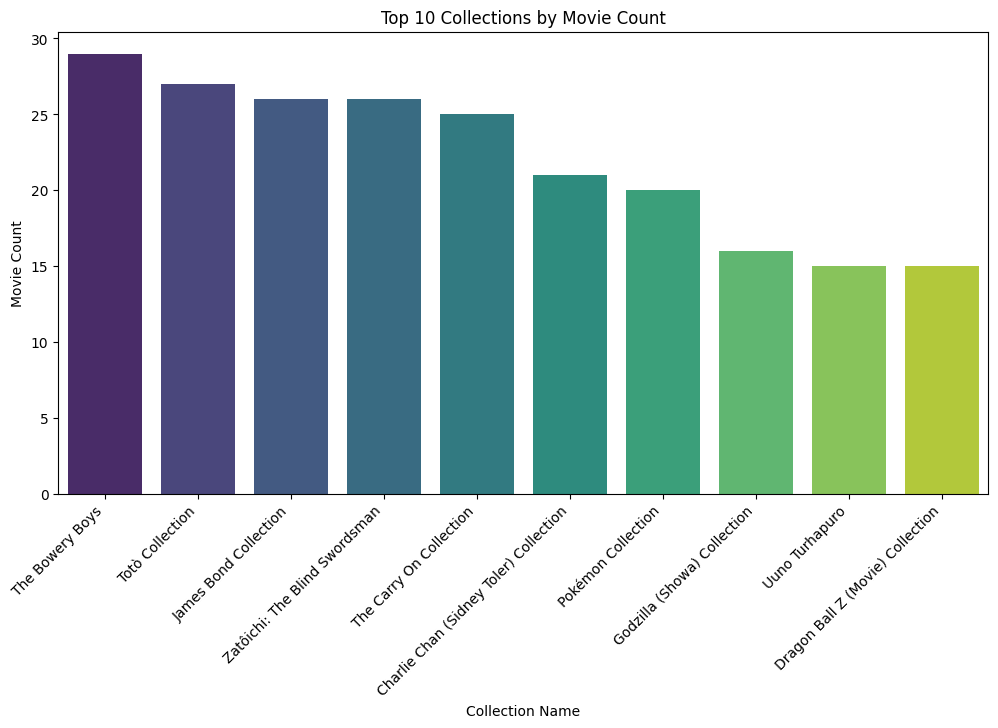

In [2559]:
# Bar plot for the top 10 collections by movie count
collection_counts = collect_df_join['name'].value_counts()
top_collections = collection_counts.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_collections.index, y=top_collections.values, palette='viridis')
plt.title('Top 10 Collections by Movie Count')
plt.xlabel('Collection Name')
plt.ylabel('Movie Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Genre - Collection

In [2560]:
collect_df_join = collect_df_join.rename(columns={'name': 'collection_name'})

merged = pd.merge(collect_df_join, df_genre_join[['movie_id', 'name']],
                  left_on='movie_id', right_on='movie_id', how='left')
merged.rename(columns={'name': 'genre'}, inplace=True)

collection_sizes = merged.groupby('collection_name')['movie_id'].count().reset_index(name='collection_size')

merged = pd.merge(merged, collection_sizes, on='collection_name', how='left')

avg_collection_by_genre = merged.groupby('genre')['collection_size'].mean().reset_index().sort_values('collection_size', ascending=False)
print("Average Collection Count by Genre:")
print(avg_collection_by_genre)


Average Collection Count by Genre:
              genre  collection_size
13          Mystery        17.354232
16         TV Movie        16.345455
1         Adventure        16.066950
4             Crime        14.399274
17         Thriller        14.398930
2         Animation        14.241963
0            Action        13.506906
7            Family        12.543909
8           Fantasy        12.405505
15  Science Fiction        11.931715
10          History        11.766234
6             Drama        11.462069
18              War        10.952941
3            Comedy        10.201131
5       Documentary        10.017699
9           Foreign         9.247059
11           Horror         9.245074
12            Music         8.836957
14          Romance         8.764151
19          Western         8.618421


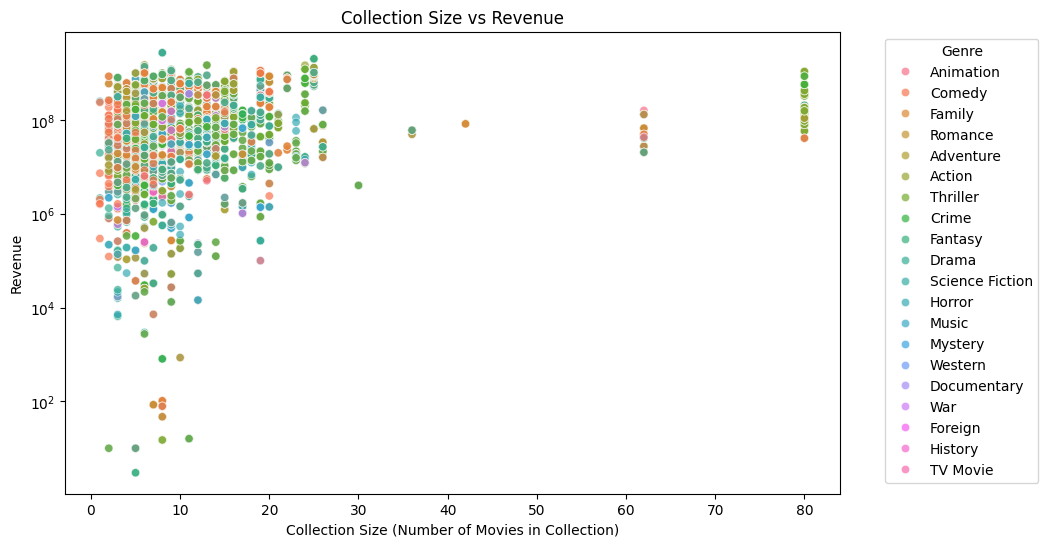

Correlation between Collection Size and Revenue: 0.04354263525626359


In [2561]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='collection_size', y='revenue', hue='genre', alpha=0.7)
plt.title('Collection Size vs Revenue')
plt.xlabel('Collection Size (Number of Movies in Collection)')
plt.ylabel('Revenue')
plt.yscale('log')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

corr_value = merged[['collection_size', 'revenue']].corr().iloc[0,1]
print("Correlation between Collection Size and Revenue:", corr_value)


### Average Revenue by Collection Order

In [2562]:
merged['release_date'] = pd.to_datetime(merged['release_date'], errors='coerce')

merged.sort_values(['collection_name', 'release_date'], inplace=True)
merged['collection_order'] = merged.groupby('collection_name').cumcount() + 1

avg_revenue_by_order = merged.groupby('collection_order')['revenue'].mean().reset_index()
print("Average Revenue by Collection Order:")
print(avg_revenue_by_order)


Average Revenue by Collection Order:
    collection_order       revenue
0                  1  5.801013e+07
1                  2  6.055997e+07
2                  3  6.156752e+07
3                  4  5.908565e+07
4                  5  6.017557e+07
..               ...           ...
75                76  5.542805e+08
76                77  1.108561e+09
77                78  8.806746e+08
78                79  8.806746e+08
79                80  8.806746e+08

[80 rows x 2 columns]


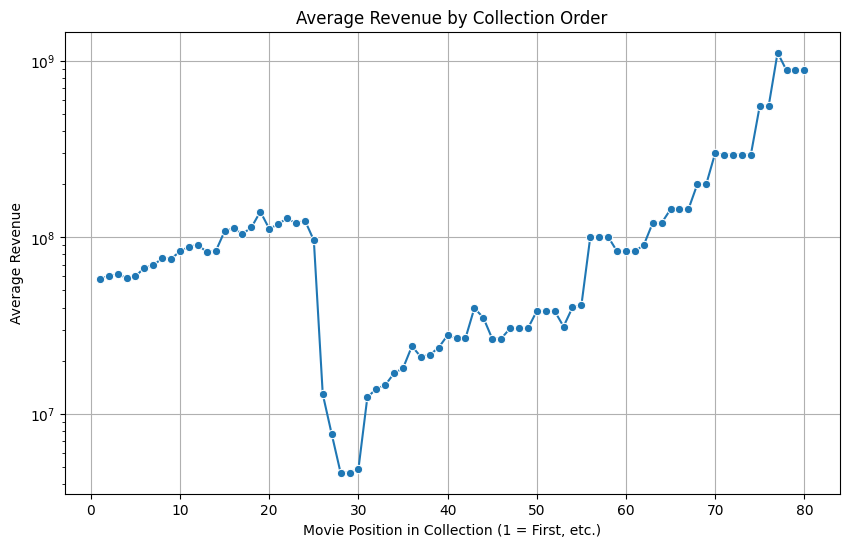

In [2563]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_revenue_by_order, x='collection_order', y='revenue', marker='o')
plt.title('Average Revenue by Collection Order')
plt.xlabel('Movie Position in Collection (1 = First, etc.)')
plt.ylabel('Average Revenue')
plt.yscale('log')
plt.grid(True)
plt.show()


## Producer

In [2564]:
df_prod_comp_join = df_prod_comp.merge(df[["id",'original_title',"vote_average","vote_count","runtime","release_date","revenue","budget","movies_before","collection_count"]], left_on="movie_id", right_on="id")
df_prod_comp_join.head()

name movie_id     id    original_title  vote_average  \
0    Pixar Animation Studios      862    862         Toy Story           7.7   
1           TriStar Pictures     8844   8844           Jumanji           6.9   
2               Teitler Film     8844   8844           Jumanji           6.9   
3  Interscope Communications     8844   8844           Jumanji           6.9   
4               Warner Bros.    15602  15602  Grumpier Old Men           6.5   

   vote_count  runtime release_date      revenue      budget  movies_before  \
0      5415.0     81.0   1995-10-30  373554033.0  30000000.0            0.0   
1      2413.0    104.0   1995-12-15  262797249.0  65000000.0            0.0   
2      2413.0    104.0   1995-12-15  262797249.0  65000000.0            0.0   
3      2413.0    104.0   1995-12-15  262797249.0  65000000.0            0.0   
4        92.0    101.0   1995-12-22          0.0         0.0            1.0   

   collection_count  
0               3.0  
1               1.0  
2               1.0  
3               1.0  
4               2.0

### Top 10 Producers by Movie Count

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\2259846105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_producers.index, y=top_producers.values, palette='viridis')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

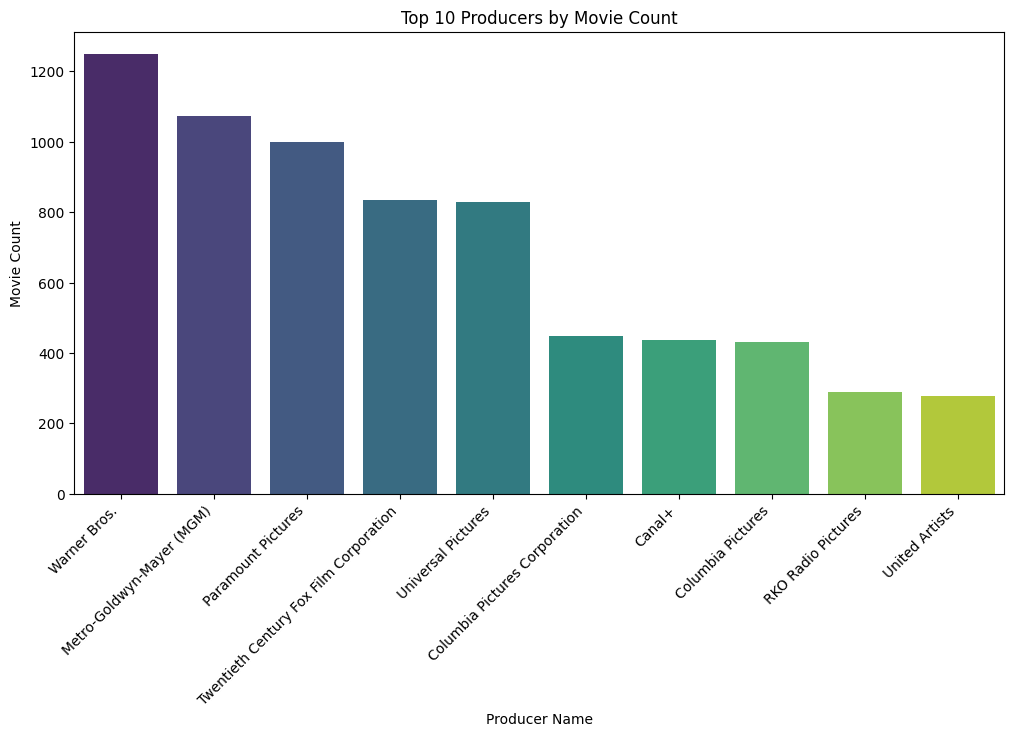

In [2565]:
plt.figure(figsize=(12,6))
producer_counts = df_prod_comp_join['name'].value_counts()
top_producers = producer_counts.head(10)
sns.barplot(x=top_producers.index, y=top_producers.values, palette='viridis')
plt.title('Top 10 Producers by Movie Count')
plt.xlabel('Producer Name')
plt.ylabel('Movie Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Keyword analysis

In [2566]:
df_keyword

name  movie_id
0           jealousy       862
1                toy       862
2                boy       862
3         friendship       862
4            friends       862
...              ...       ...
158675  mockumentary    289923
158676   tragic love    439050
158677        artist    111109
158678          play    111109
158679         pinoy    111109

[158680 rows x 2 columns]

In [2567]:
# to str
df_keyword["movie_id"] = df_keyword["movie_id"].astype(str)
df_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158680 entries, 0 to 158679
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   name      158680 non-null  object
 1   movie_id  158680 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [2568]:
df.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'movie_id',
       'collection_name', 'movies_before', 'collection_count'],
      dtype='object')

In [2569]:
df_keyword_join = df_keyword.merge(df[["id",'original_title',"movies_before","collection_count"]], left_on="movie_id", right_on="id")
df_keyword_join.head()

name movie_id   id original_title  movies_before  collection_count
0    jealousy      862  862      Toy Story            0.0               3.0
1         toy      862  862      Toy Story            0.0               3.0
2         boy      862  862      Toy Story            0.0               3.0
3  friendship      862  862      Toy Story            0.0               3.0
4     friends      862  862      Toy Story            0.0               3.0

In [2570]:
# Join with genre
df_keyword_join = df_keyword_join.merge(df_genre_join[["movie_id",'name']], left_on="movie_id", right_on="movie_id")

In [2571]:
df_keyword_join.rename(columns={'name_x':'keyword','name_y': 'genre'}, inplace=True)

In [2572]:
df_keyword_join.drop(columns=['id'], inplace=True)

In [2573]:
df_keyword_join.head(5)

keyword movie_id original_title  movies_before  collection_count  \
0  jealousy      862      Toy Story            0.0               3.0   
1  jealousy      862      Toy Story            0.0               3.0   
2  jealousy      862      Toy Story            0.0               3.0   
3       toy      862      Toy Story            0.0               3.0   
4       toy      862      Toy Story            0.0               3.0   

       genre  
0  Animation  
1     Comedy  
2     Family  
3  Animation  
4     Comedy

In [2574]:
print("\nNumber of unique movies:", df_keyword_join['movie_id'].nunique())
print("Number of unique keywords:", df_keyword_join['keyword'].nunique())
print("Number of unique genres:", df_keyword_join['genre'].nunique())


Number of unique movies: 30725
Number of unique keywords: 19934
Number of unique genres: 20


### Top 20 Keywords by Number of Movies

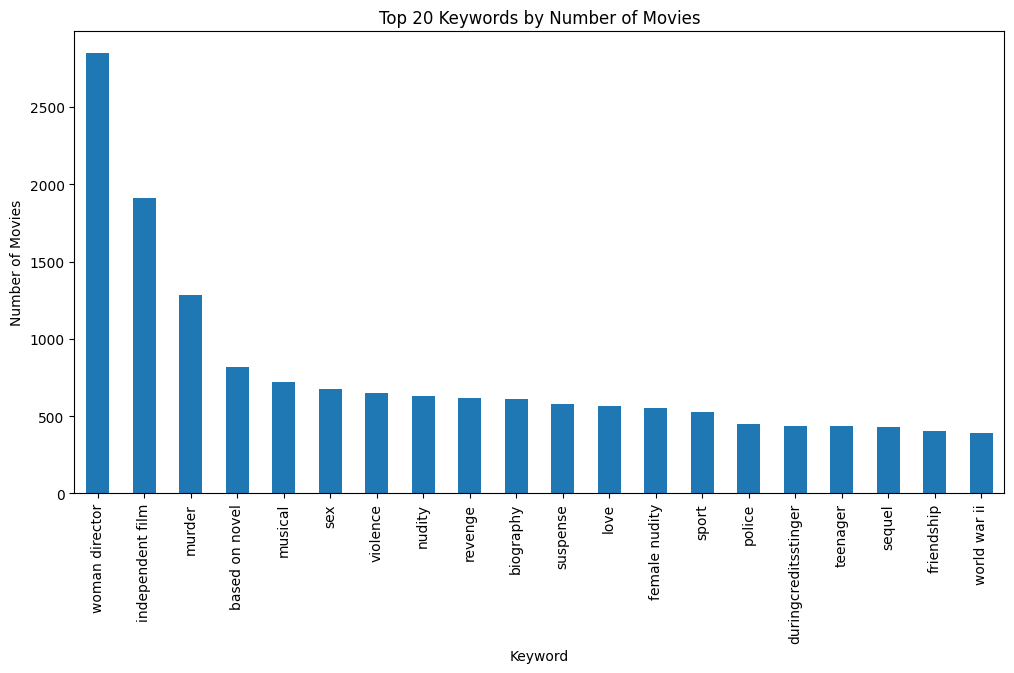

In [2575]:
keyword_counts = df_keyword_join.groupby('keyword')['movie_id'].nunique().sort_values(ascending=False)

top_keywords = keyword_counts.head(20)
plt.figure(figsize=(12, 6))
top_keywords.plot(kind='bar')
plt.title('Top 20 Keywords by Number of Movies')
plt.xlabel('Keyword')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

### Distribution of Number of Genres per Movie

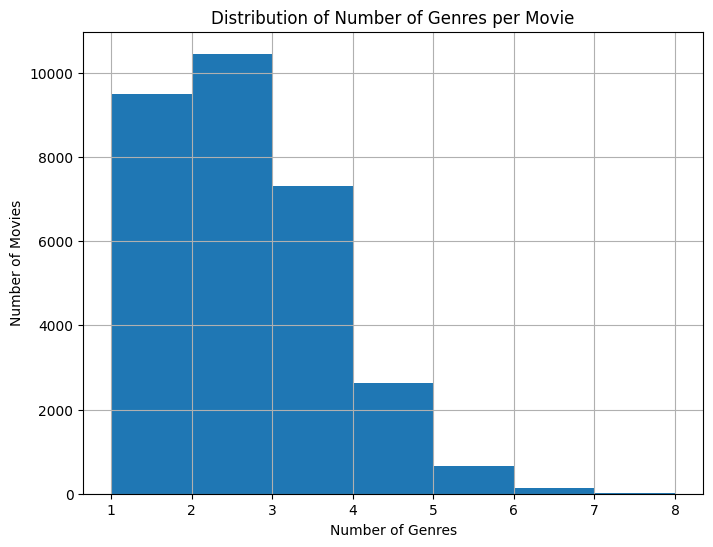

In [2576]:
genres_per_movie = df_keyword_join.groupby('movie_id')['genre'].nunique()

plt.figure(figsize=(8, 6))
genres_per_movie.hist(bins=range(1, genres_per_movie.max() + 1))
plt.title('Distribution of Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.show()

### Distribution of Number of Keywords per Movie

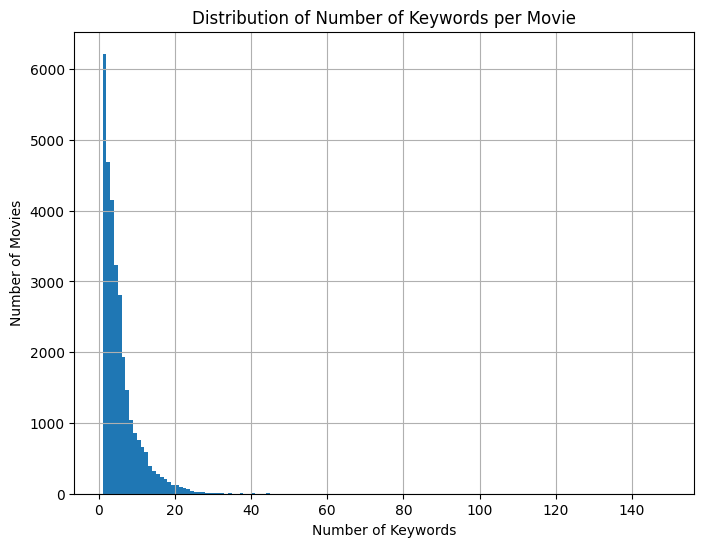

In [2577]:
keywords_per_movie = df_keyword_join.groupby('movie_id')['keyword'].nunique()

plt.figure(figsize=(8, 6))
keywords_per_movie.hist(bins=range(1, keywords_per_movie.max() + 1))
plt.title('Distribution of Number of Keywords per Movie')
plt.xlabel('Number of Keywords')
plt.ylabel('Number of Movies')
plt.show()

### Most Common keyword-genre pairs

In [2578]:
keyword_genre_counts = df_keyword_join.groupby(['keyword', 'genre'])['movie_id'].nunique().reset_index(name='movie_count')
top_keyword_genre = keyword_genre_counts.sort_values(by='movie_count', ascending=False).head(30)
print("Top 30 keyword-genre pairs:\n", top_keyword_genre)

Top 30 keyword-genre pairs:
                 keyword        genre  movie_count
97288    woman director        Drama         1604
44387  independent film        Drama         1259
97285    woman director       Comedy          795
44384  independent film       Comedy          741
58274            murder     Thriller          683
97287    woman director  Documentary          636
97296    woman director      Romance          591
58263            murder        Drama          572
7126     based on novel        Drama          546
8773          biography        Drama          469
58268            murder       Horror          445
58261            murder        Crime          431
44395  independent film      Romance          424
86616          suspense     Thriller          420
78503               sex        Drama          418
51725              love        Drama          413
58577           musical       Comedy          376
51733              love      Romance          363
83929   stand-up come

### Top 10 keywords for Animation genre

In [2579]:
animation_keywords = df_keyword_join[df_keyword_join['genre'] == 'Animation'].groupby('keyword')['movie_id'].nunique().sort_values(ascending=False)
print("Top 10 keywords for Animation genre:\n", animation_keywords.head(10))

Top 10 keywords for Animation genre:
 keyword
anime                   129
short                    99
animation                89
woman director           81
musical                  71
duringcreditsstinger     52
super powers             52
adult animation          51
superhero                48
surrealism               48
Name: movie_id, dtype: int64


### Keyword word cloud

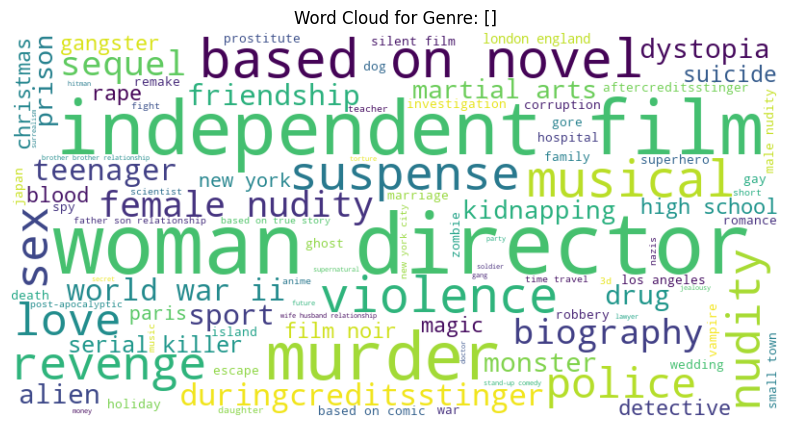

In [2580]:
keyword_freq = df_keyword_join['keyword'].value_counts().to_dict()

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100
).generate_from_frequencies(keyword_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Genre: {genre}')
plt.show()

### Keyword by genre

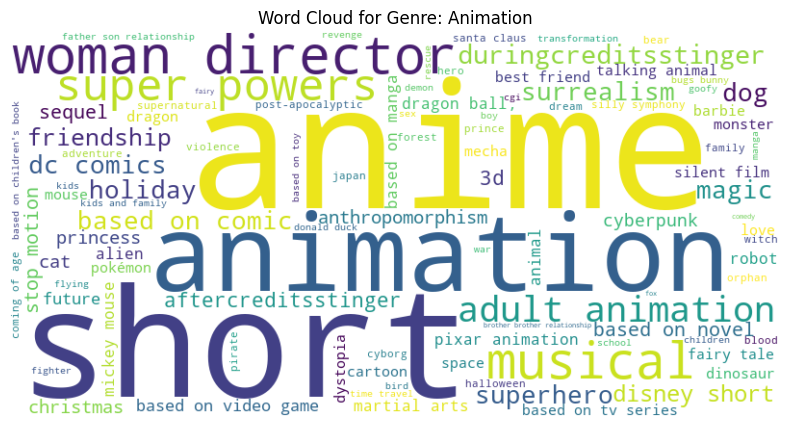

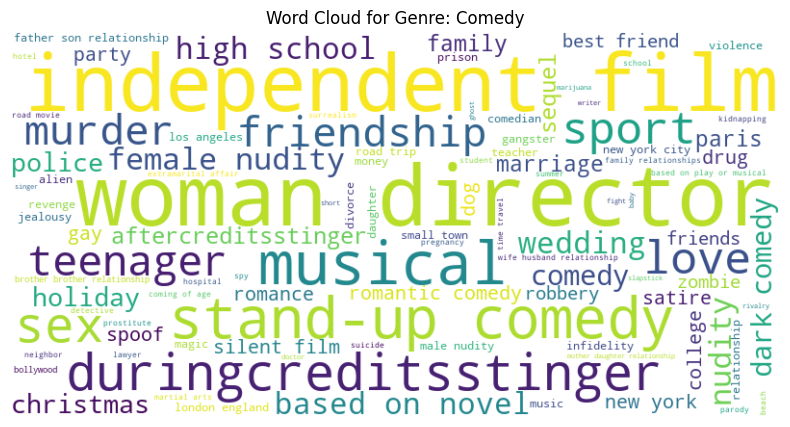

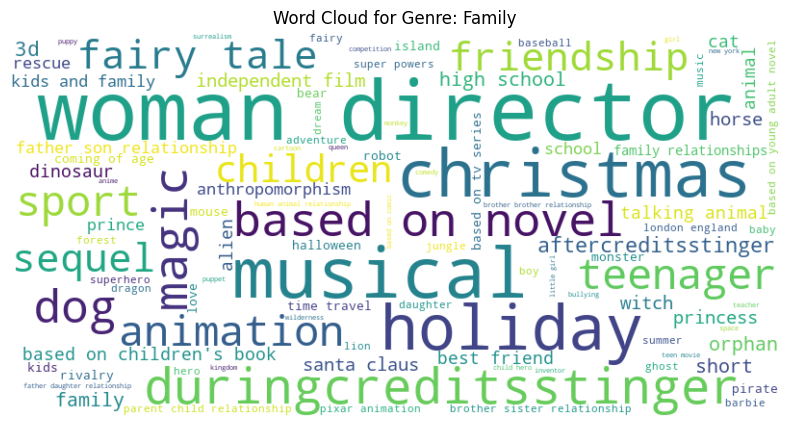

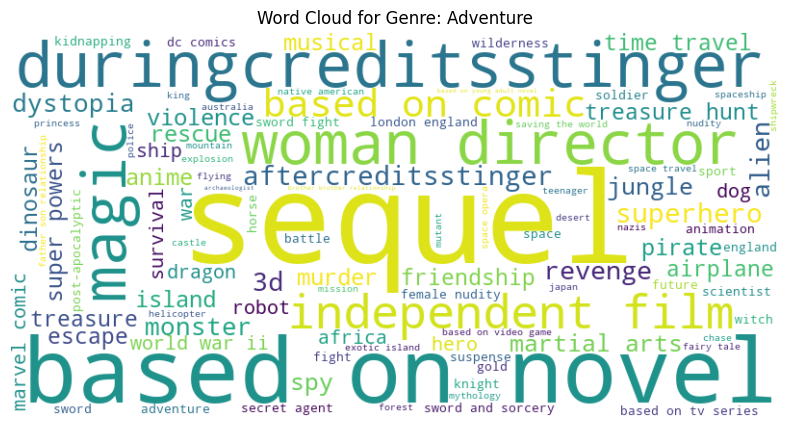

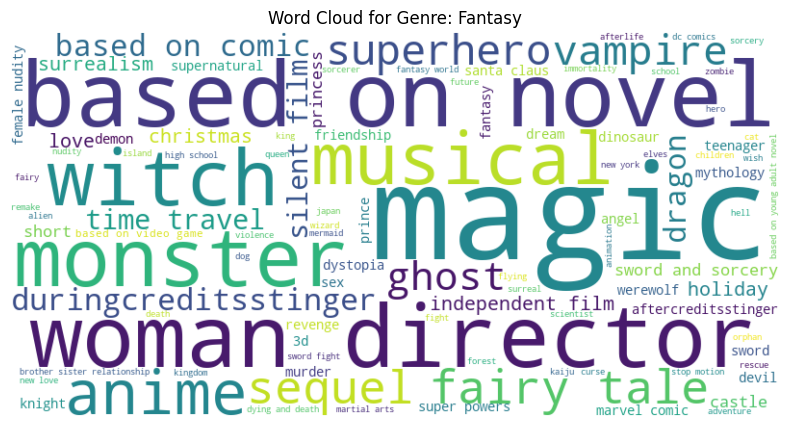

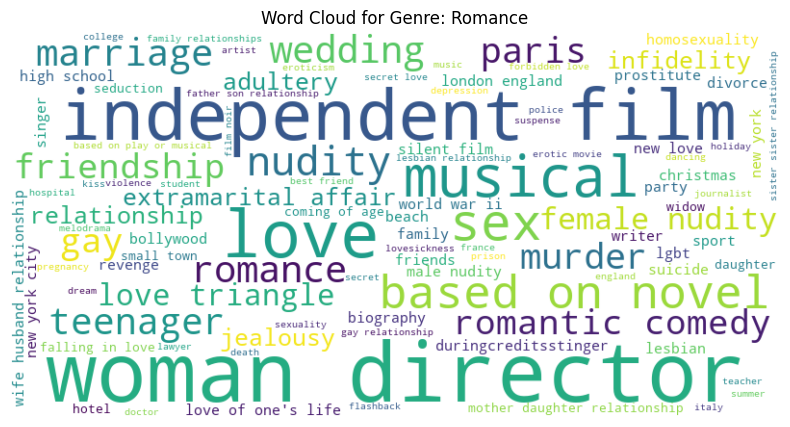

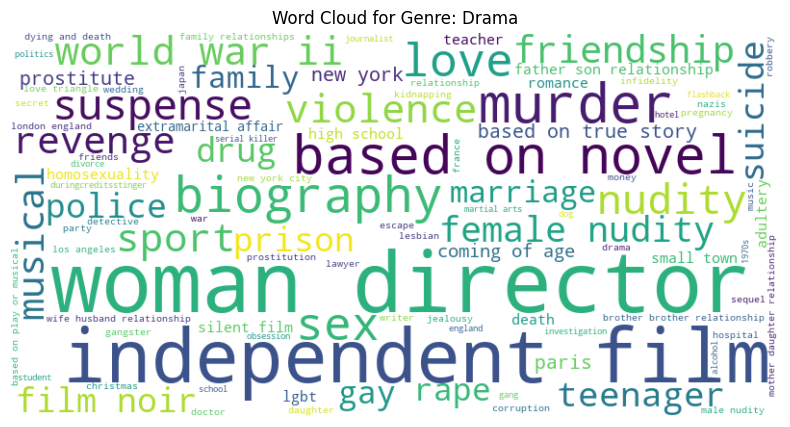

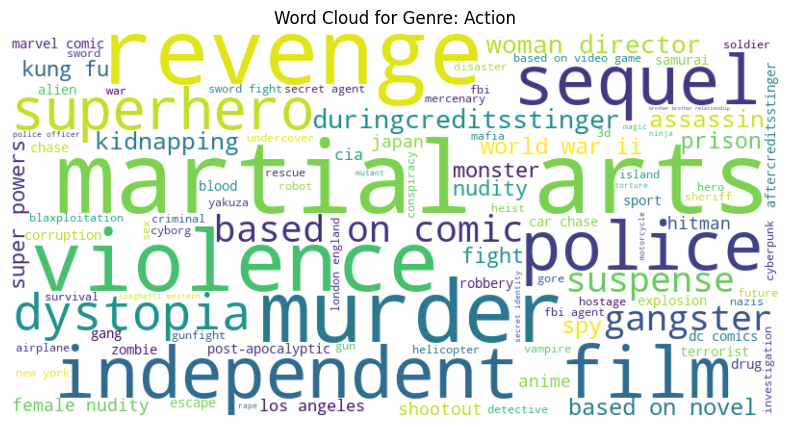

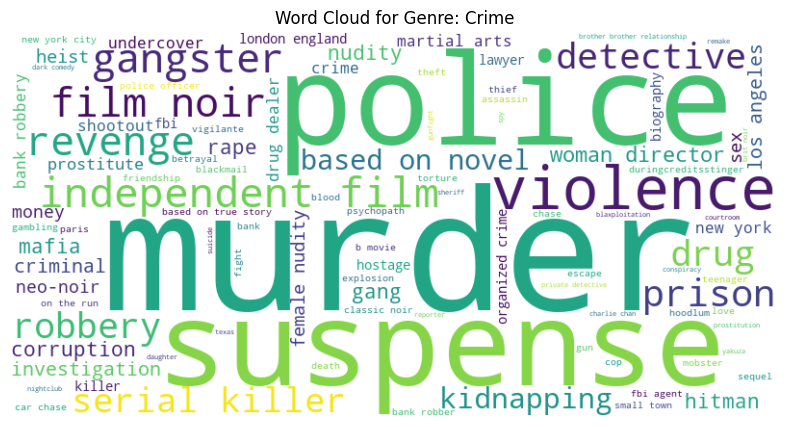

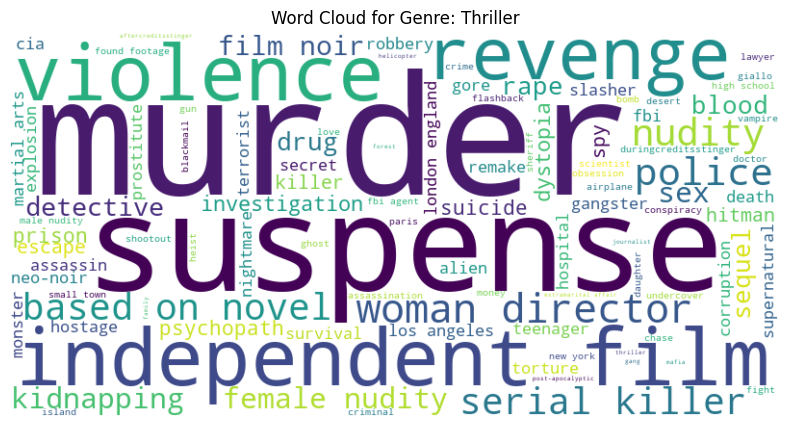

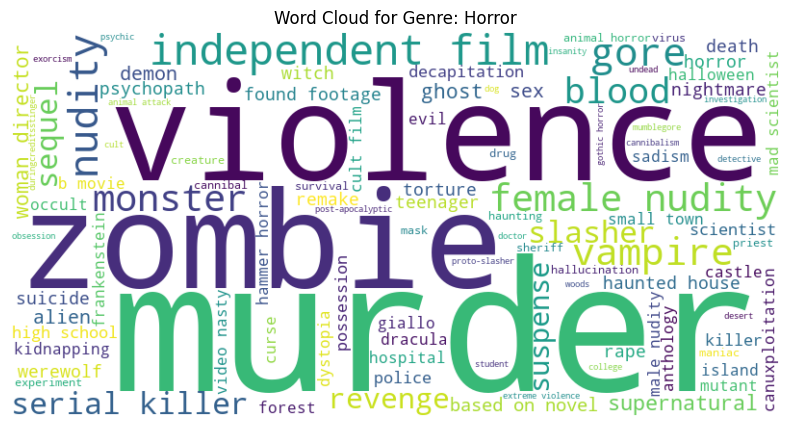

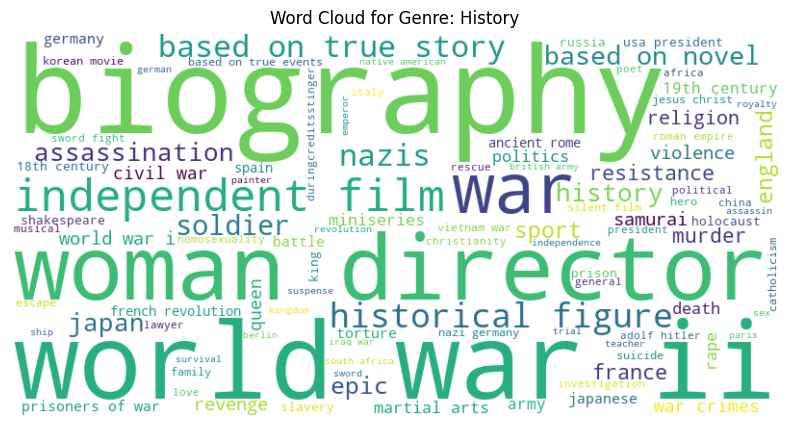

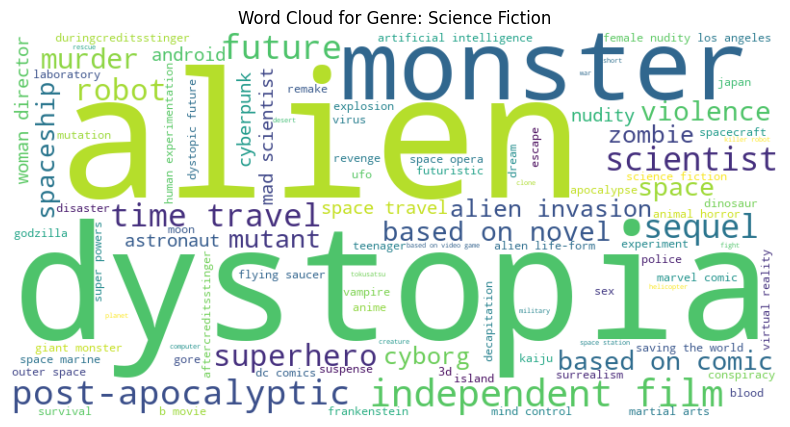

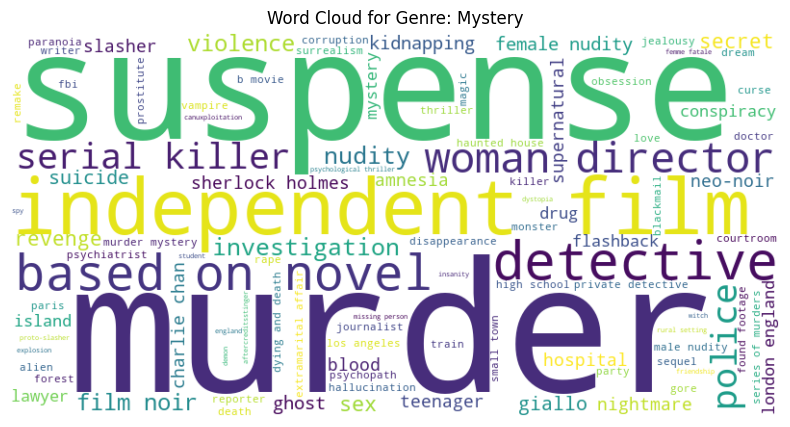

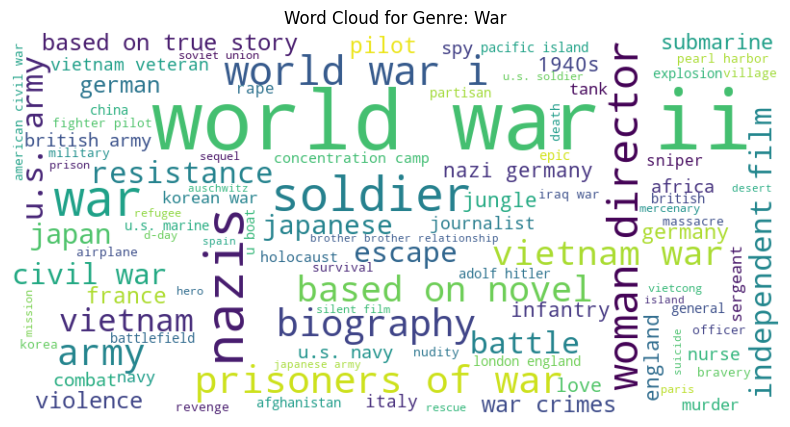

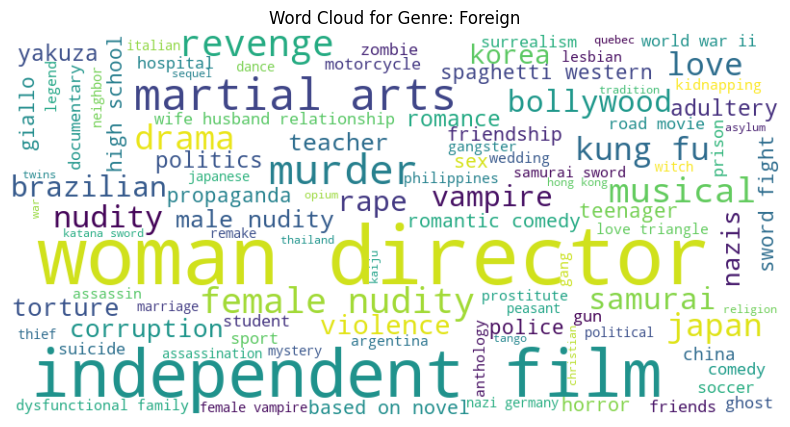

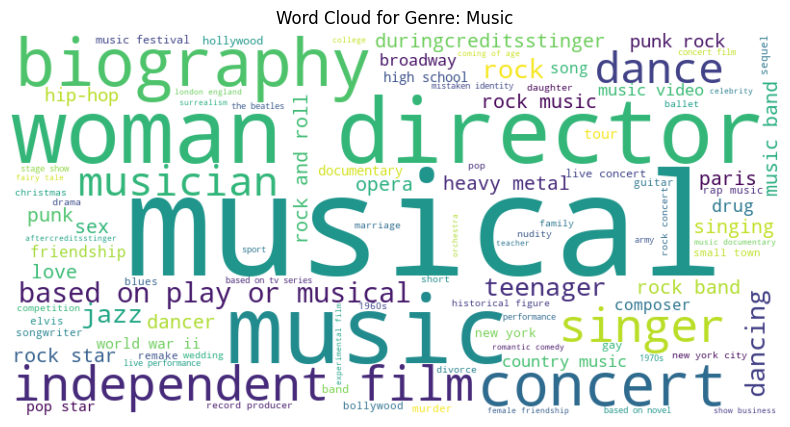

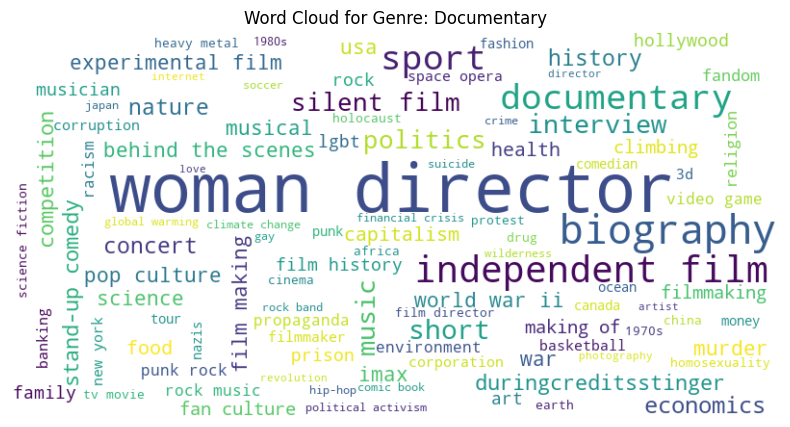

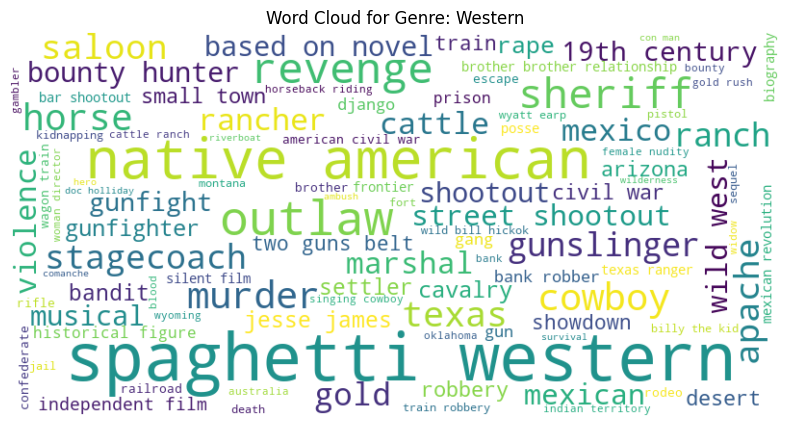

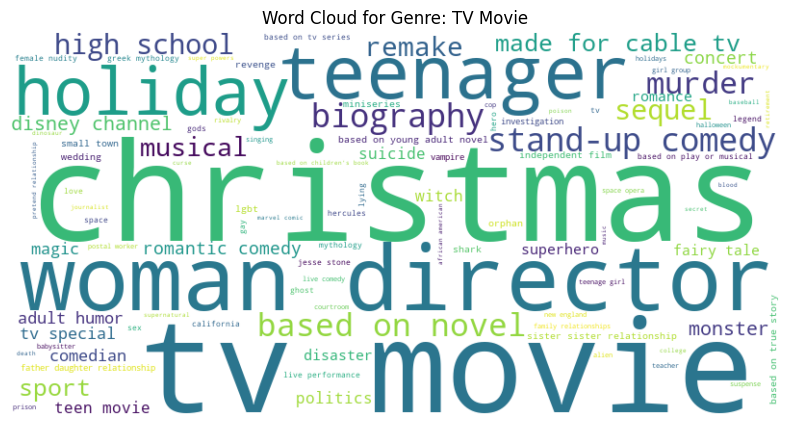

In [2581]:
genres = df_keyword_join['genre'].unique()

# Loop through each genre to create a word cloud
for genre in genres:
    # Filter the DataFrame for the current genre
    genre_df = df_keyword_join[df_keyword_join['genre'] == genre]

    # Count the frequency of each keyword in this genre
    keyword_freq = genre_df['keyword'].value_counts().to_dict()

    # Generate a word cloud from the keyword frequencies
    wordcloud = WordCloud(
        width=800,           # Width of the word cloud image
        height=400,          # Height of the word cloud image
        background_color='white',  # Background color
        max_words=100        # Limit to the top 100 most frequent keywords
    ).generate_from_frequencies(keyword_freq)

    # Set up the plot
    plt.figure(figsize=(10, 5))  # Size of the displayed figure
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
    plt.axis('off')              # Hide axes
    plt.title(f'Word Cloud for Genre: {genre}')  # Add a title
    plt.show()                   # Show the plot
    print("\n\n\n")

# Find Insight

In [2582]:
df_genre_join

name movie_id      id       original_title  vote_average  \
0      Animation      862     862            Toy Story           7.7   
1         Comedy      862     862            Toy Story           7.7   
2         Family      862     862            Toy Story           7.7   
3      Adventure     8844    8844              Jumanji           6.9   
4        Fantasy     8844    8844              Jumanji           6.9   
...          ...      ...     ...                  ...           ...   
91001     Family   439050  439050              رگ خواب           4.0   
91002      Drama   111109  111109  Siglo ng Pagluluwal           9.0   
91003     Action    67758   67758             Betrayal           3.8   
91004      Drama    67758   67758             Betrayal           3.8   
91005   Thriller    67758   67758             Betrayal           3.8   

       vote_count  runtime release_date      revenue      budget  \
0          5415.0     81.0   1995-10-30  373554033.0  30000000.0   
1          5415.0     81.0   1995-10-30  373554033.0  30000000.0   
2          5415.0     81.0   1995-10-30  373554033.0  30000000.0   
3          2413.0    104.0   1995-12-15  262797249.0  65000000.0   
4          2413.0    104.0   1995-12-15  262797249.0  65000000.0   
...           ...      ...          ...          ...         ...   
91001         1.0     90.0          NaT          0.0         0.0   
91002         3.0    360.0   2011-11-17          0.0         0.0   
91003         6.0     90.0   2003-08-01          0.0         0.0   
91004         6.0     90.0   2003-08-01          0.0         0.0   
91005         6.0     90.0   2003-08-01          0.0         0.0   

       movies_before  collection_count  release_year  
0                0.0               3.0        1995.0  
1                0.0               3.0        1995.0  
2                0.0               3.0        1995.0  
3                0.0               1.0        1995.0  
4                0.0               1.0        1995.0  
...              ...               ...           ...  
91001            0.0               1.0           NaN  
91002            0.0               1.0        2011.0  
91003            0.0               1.0        2003.0  
91004            0.0               1.0        2003.0  
91005            0.0               1.0        2003.0  

[91006 rows x 13 columns]

In [2583]:
sequels_count_df

movie_id            collection_name  movies_before  collection_count
0      117263  ... Has Fallen Collection              0                 2
1      267860  ... Has Fallen Collection              1                 2
2        1652     00 Schneider Filmreihe              0                 1
3       19430           08/15 Collection              0                 1
4       10035       100 Girls Collection              0                 2
...       ...                        ...            ...               ...
4482   125271                男はつらいよ シリーズ              0                 3
4483   253232                男はつらいよ シリーズ              1                 3
4484   261538                男はつらいよ シリーズ              2                 3
4485    82406                     식객 시리즈              0                 2
4486    72857                     식객 시리즈              1                 2

[4487 rows x 4 columns]

In [2584]:
df_keyword_join

keyword movie_id       original_title  movies_before  \
0          jealousy      862            Toy Story            0.0   
1          jealousy      862            Toy Story            0.0   
2          jealousy      862            Toy Story            0.0   
3               toy      862            Toy Story            0.0   
4               toy      862            Toy Story            0.0   
...             ...      ...                  ...            ...   
368998  tragic love   439050              رگ خواب            0.0   
368999  tragic love   439050              رگ خواب            0.0   
369000       artist   111109  Siglo ng Pagluluwal            0.0   
369001         play   111109  Siglo ng Pagluluwal            0.0   
369002        pinoy   111109  Siglo ng Pagluluwal            0.0   

        collection_count      genre  
0                    3.0  Animation  
1                    3.0     Comedy  
2                    3.0     Family  
3                    3.0  Animation  
4                    3.0     Comedy  
...                  ...        ...  
368998               1.0      Drama  
368999               1.0     Family  
369000               1.0      Drama  
369001               1.0      Drama  
369002               1.0      Drama  

[369003 rows x 6 columns]

In [2585]:
# toystory
df[df["original_title"].str.contains("Toy Story")]  




adult       budget                                             genres  \
0      False   30000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
2996   False   90000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
15342  False  200000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
21913  False          0.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
25781  False          0.0  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   

                                     homepage      id    imdb_id  \
0        http://toystory.disney.com/toy-story     862  tt0114709   
2996   http://toystory.disney.com/toy-story-2     863  tt0120363   
15342          http://disney.go.com/toystory/   10193  tt0435761   
21913                                     NaN  213121  tt2446040   
25781                                     NaN  256835  tt3473654   

      original_language              original_title  \
0                    en                   Toy Story   
2996                 en                 Toy Story 2   
15342                en                 Toy Story 3   
21913                en        Toy Story of Terror!   
25781                en  Toy Story That Time Forgot   

                                                overview  popularity  ...  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943  ...   
2996   Andy heads off to Cowboy Camp, leaving his toy...   17.547693  ...   
15342  Woody, Buzz, and the rest of Andy's toys haven...   16.966470  ...   
21913  What starts out as a fun road trip for the Toy...    0.512025  ...   
25781  During a post-Christmas play date, the gang fi...    8.609555  ...   

         status                    tagline                       title  video  \
0      Released                        NaN                   Toy Story  False   
2996   Released         The toys are back!                 Toy Story 2  False   
15342  Released   No toy gets left behind.                 Toy Story 3  False   
21913  Released  One toy gets left behind!        Toy Story of Terror!  False   
25781  Released                        NaN  Toy Story That Time Forgot  False   

       vote_average  vote_count movie_id       collection_name movies_before  \
0               7.7      5415.0      862  Toy Story Collection           0.0   
2996            7.3      3914.0      863  Toy Story Collection           1.0   
15342           7.6      4710.0    10193  Toy Story Collection           2.0   
21913           7.3       246.0      NaN                   NaN           0.0   
25781           6.8       249.0      NaN                   NaN           0.0   

      collection_count  
0                  3.0  
2996               3.0  
15342              3.0  
21913              1.0  
25781              1.0  

[5 rows x 27 columns]

In [2586]:
df_prod_comp_join

name movie_id      id       original_title  \
0            Pixar Animation Studios      862     862            Toy Story   
1                   TriStar Pictures     8844    8844              Jumanji   
2                       Teitler Film     8844    8844              Jumanji   
3          Interscope Communications     8844    8844              Jumanji   
4                       Warner Bros.    15602   15602     Grumpier Old Men   
...                              ...      ...     ...                  ...   
70459    20th Century Fox Television    30840   30840           Robin Hood   
70460  CanWest Global Communications    30840   30840           Robin Hood   
70461                    Sine Olivia   111109  111109  Siglo ng Pagluluwal   
70462        American World Pictures    67758   67758             Betrayal   
70463                      Yermoliev   227506  227506  Satana likuyushchiy   

       vote_average  vote_count  runtime release_date      revenue  \
0               7.7      5415.0     81.0   1995-10-30  373554033.0   
1               6.9      2413.0    104.0   1995-12-15  262797249.0   
2               6.9      2413.0    104.0   1995-12-15  262797249.0   
3               6.9      2413.0    104.0   1995-12-15  262797249.0   
4               6.5        92.0    101.0   1995-12-22          0.0   
...             ...         ...      ...          ...          ...   
70459           5.7        26.0    104.0   1991-05-13          0.0   
70460           5.7        26.0    104.0   1991-05-13          0.0   
70461           9.0         3.0    360.0   2011-11-17          0.0   
70462           3.8         6.0     90.0   2003-08-01          0.0   
70463           0.0         0.0     87.0   1917-10-21          0.0   

           budget  movies_before  collection_count  
0      30000000.0            0.0               3.0  
1      65000000.0            0.0               1.0  
2      65000000.0            0.0               1.0  
3      65000000.0            0.0               1.0  
4             0.0            1.0               2.0  
...           ...            ...               ...  
70459         0.0            0.0               1.0  
70460         0.0            0.0               1.0  
70461         0.0            0.0               1.0  
70462         0.0            0.0               1.0  
70463         0.0            0.0               1.0  

[70464 rows x 12 columns]

# Find Insight

### รวม Data ที่จำเป็นต่อการวิเคราะห์ และกำจัด Movie ที่ซ้ำซ้อนใน Collection

In [2610]:
df_insight = df_cast_first[["movie_id","main_cast_gender","main_cast_character","main_cast_name"]]
df_insight = df_insight.merge(collect_df_join, left_on="movie_id",right_on="movie_id")
df_insight = df_insight[["movie_id","main_cast_gender","main_cast_character","main_cast_name","collection_name","movies_before","collection_count","vote_average","revenue","budget"]]
df_insight["movie_after"] = df_insight["collection_count"] - df_insight["movies_before"] - 1
df_insight["roi"] = df_insight["revenue"] / df_insight["budget"]
df_insight = df_insight.replace([np.inf, -np.inf], np.nan)
df_insight = df_insight.dropna(subset=['roi'])
df_insight = df_insight.groupby("collection_name").head(5)
df_insight = df_insight[df_insight["movie_after"]!=0]

### นำนำข้อมูล Movie ภาคต่อไปมาใส่ใน Feature

In [2611]:
def find_next_sequel(row):
    if row["movie_after"] == 0:
        return None
    else:
        return df_insight[df_insight["collection_name"]==row["collection_name"]]["movie_id"].values[0]
    
def attribute_of_next_sequel(row, column_name):
    movie_id = find_next_sequel(row)

    if movie_id is None:
        return None
    else:
        return df_insight[df_insight["movie_id"]==movie_id][column_name].values[0]


In [2612]:
df_insight["vote_after"] = df_insight.apply(lambda x : attribute_of_next_sequel(x,"vote_average"),axis=1)

In [2613]:
# First, count genre occurrences to identify those with count less than 500
genre_counts = df_genre['name'].value_counts()
valid_genres = genre_counts[genre_counts >= 500].index.tolist()

# Create a dictionary to store genres for each movie_id (excluding genres with count < 100)
movie_genres = {}
for _, row in df_genre.iterrows():
    movie_id = row['movie_id']
    genre = row['name']
    
    # Only include genres that have count >= 100
    if genre in valid_genres:
        if movie_id in movie_genres:
            movie_genres[movie_id].append(genre)
        else:
            movie_genres[movie_id] = [genre]

# Add filtered genres to df_insight
df_insight['genres'] = df_insight['movie_id'].apply(lambda x: movie_genres.get(x, []))

# Display the result
df_insight.head()


movie_id main_cast_gender           main_cast_character  \
0      862              man                 Woody (voice)   
3      710              man                    James Bond   
5     9273              man                   Ace Ventura   
6     8012              man                  Chili Palmer   
7     9598            woman  Babe the Gallant Pig (voice)   

        main_cast_name          collection_name  movies_before  \
0            Tom Hanks     Toy Story Collection            0.0   
3       Pierce Brosnan    James Bond Collection           18.0   
5           Jim Carrey   Ace Ventura Collection            1.0   
6        John Travolta  Chili Palmer Collection            0.0   
7  Christine Cavanaugh          Babe Collection            0.0   

   collection_count  vote_average      revenue      budget  movie_after  \
0               3.0           7.7  373554033.0  30000000.0          2.0   
3              26.0           6.6  352194034.0  58000000.0          7.0   
5               3.0           6.1  212385533.0  30000000.0          1.0   
6               2.0           6.4  115101622.0  30250000.0          1.0   
7               2.0           6.0  254134910.0  30000000.0          1.0   

         roi  vote_after                            genres  
0  12.451801         7.7       [Animation, Comedy, Family]  
3   6.072311         6.6     [Adventure, Action, Thriller]  
5   7.079518         6.1        [Crime, Comedy, Adventure]  
6   3.805012         6.4         [Comedy, Thriller, Crime]  
7   8.471164         6.0  [Fantasy, Drama, Comedy, Family]

In [2614]:
all_genres = set()
for genres in df_insight['genres']:
    for genre in genres:
        all_genres.add(genre)

for genre in all_genres:
    df_insight["genre_"+genre] = df_insight['genres'].apply(lambda x: 1 if genre in x else 0)


In [2615]:
all_genres = set(col for col in df_insight.columns if col.startswith('genre_'))

In [2616]:
df_keyword_agg = df_keyword.groupby("movie_id")["name"].apply(list).reset_index().rename(columns={"name":"keywords"})
df_keyword_agg.head(5)

movie_id                                           keywords
0      100  [ambush, alcohol, shotgun, tea, joint, machism...
1    10000  [roommate, pastor, squatter, anarchist, house,...
2    10001  [atomic bomb, nobel prize, rock, albert einste...
3   100010                                      [pilot, navy]
4   100017  [fetishism, masochism, submissive, older woman...

In [2617]:
df_insight_with_keywords = df_insight.merge(df_keyword_agg, on="movie_id", how="left")

all_keywords = []
for keywords in df_insight_with_keywords['keywords'].dropna():
    all_keywords.extend(keywords)
unique_keywords = list(set(all_keywords))

# Remove 'sequel' from unique keywords if it exists
unique_keywords.remove('sequel')
unique_keywords.remove('duringcreditsstinger')
unique_keywords.remove('aftercreditsstinger')

def keyword_to_onehot(keywords_list, unique_keywords):
    if isinstance(keywords_list, list):
        return {f"keyword_{keyword}": 1 if keyword in keywords_list else 0 for keyword in unique_keywords}
    else:
        return {f"keyword_{keyword}": 0 for keyword in unique_keywords}

keyword_dummies = df_insight_with_keywords['keywords'].apply(
    lambda x: keyword_to_onehot(x, unique_keywords)
)

keyword_df = pd.DataFrame(keyword_dummies.tolist(), index=df_insight_with_keywords.index)

df_insight_with_keywords = pd.concat([df_insight_with_keywords, keyword_df], axis=1)

In [2618]:
# keyword column
keyword_column = df_insight_with_keywords.columns[df_insight_with_keywords.columns.str.contains("keyword")][1:]
genre_column = df_insight_with_keywords.columns[df_insight_with_keywords.columns.str.contains("genre")][1:]
df_insight_with_keywords["vote_increase"] = (df_insight_with_keywords["vote_after"]/df_insight_with_keywords["vote_average"])-1
interested = df_insight_with_keywords.drop(["movie_id","vote_after","roi","genres","keywords"],axis=1)

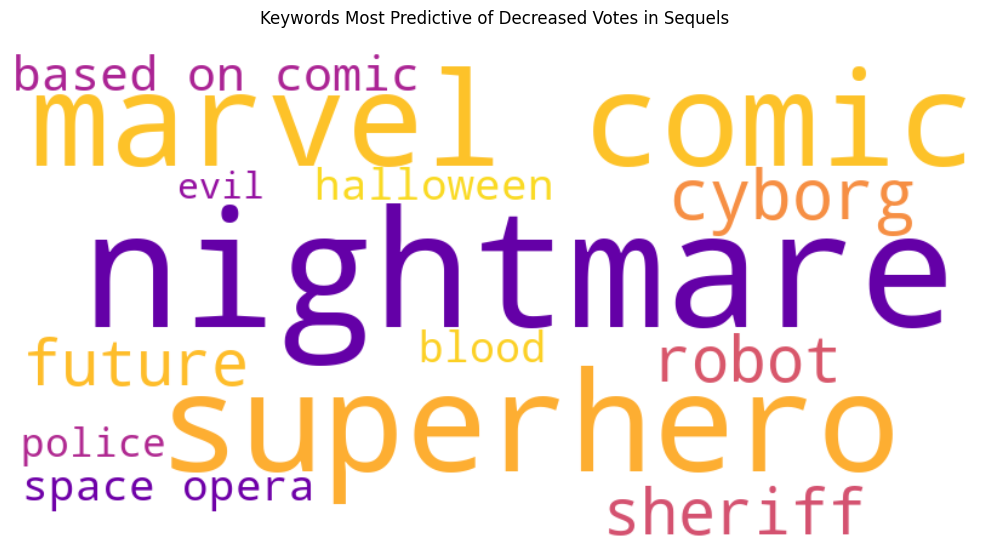

10 คำสำคัญที่ทำนายการลดลงของคะแนนโหวตในภาคต่อได้มากที่สุด (ปรากฏ ≥5 ครั้ง):
1. nightmare: 5.00% ในกลุ่มที่คะแนนลดลง vs 0.63% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 7.99, ค่า p-value: 0.0020, จำนวนที่พบทั้งหมด: 10)
2. superhero: 8.75% ในกลุ่มที่คะแนนลดลง vs 2.40% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 3.65, ค่า p-value: 0.0030, จำนวนที่พบทั้งหมด: 30)
3. marvel comic: 6.25% ในกลุ่มที่คะแนนลดลง vs 1.46% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 4.28, ค่า p-value: 0.0100, จำนวนที่พบทั้งหมด: 19)
4. cyborg: 5.00% ในกลุ่มที่คะแนนลดลง vs 1.04% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 4.80, ค่า p-value: 0.0200, จำนวนที่พบทั้งหมด: 14)
5. robot: 3.75% ในกลุ่มที่คะแนนลดลง vs 0.73% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 5.14, ค่า p-value: 0.0410, จำนวนที่พบทั้งหมด: 10)
6. sheriff: 3.75% ในกลุ่มที่คะแนนลดลง vs 0.73% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 5.14, ค่า p-value: 0.0290, จำนวนที่พบทั้งหมด: 10)
7. future: 3.75% ในกลุ่มที่คะแนนลดลง vs 0.73% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 5.14, ค่า p-value: 0.0370, จำนว

In [ ]:
# Get the movies with decreased and increased votes
decreased_votes_df = interested[interested["vote_increase"] < 0]
increased_votes_df = interested[interested["vote_increase"] >= 0]

# Create X (features) and y (target)
keyword_columns = [col for col in interested.columns if col.startswith('keyword_')]

# Filter out rare keywords (occurring less than 5 times in total)
keyword_counts = interested[keyword_columns].sum()
frequent_keywords = keyword_counts[keyword_counts >= 10].index.tolist()

# Only use frequent keywords for analysis
X = interested[frequent_keywords]
y = (interested["vote_increase"] < 0).astype(int) 

chi2_values, p_values = chi2(X, y)

permutation_results = {}

n_permutations = 1000

for i, col in enumerate(frequent_keywords):
    keyword = col[8:] 

    if decreased_votes_df[col].sum() > 0:
        decreased_pct = decreased_votes_df[col].sum() / len(decreased_votes_df)
        increased_pct = increased_votes_df[col].sum() / len(increased_votes_df) if len(increased_votes_df) > 0 else 0
        observed_diff = decreased_pct - increased_pct

        if observed_diff > 0:
            # Permutation test
            permutation_diffs = []
            combined_data = interested[col].values
            combined_labels = y.values
            
            for _ in range(n_permutations):
                shuffled_labels = shuffle(combined_labels)
                
                perm_decreased = combined_data[shuffled_labels == 1]
                perm_increased = combined_data[shuffled_labels == 0]
                
                perm_decreased_pct = np.mean(perm_decreased) if len(perm_decreased) > 0 else 0
                perm_increased_pct = np.mean(perm_increased) if len(perm_increased) > 0 else 0
                
                permutation_diffs.append(perm_decreased_pct - perm_increased_pct)
            
            # proportion of permutations with diff >= observed)
            p_value = np.mean([diff >= observed_diff for diff in permutation_diffs])
            
            if p_value < 0.1: 
                ratio = decreased_pct / increased_pct if increased_pct > 0 else float('inf')
                permutation_results[keyword] = {
                    'chi2': chi2_values[i],
                    'p_value': p_value,
                    'ratio': ratio,
                    'decreased_pct': decreased_pct * 100,
                    'increased_pct': increased_pct * 100,
                    'count': keyword_counts[col]
                }

# Sort by chi2 value (higher means more predictive)
sorted_keywords = {k: v for k, v in sorted(permutation_results.items(), 
                                          key=lambda item: item[1]['chi2'], 
                                          reverse=True)}

# Create a dictionary for the word cloud (using chi2 values as weights)
wordcloud_dict = {k: v['chi2'] for k, v in sorted_keywords.items()}

# Create a word cloud with the most predictive keywords
if wordcloud_dict:
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=100, colormap='plasma').generate_from_frequencies(wordcloud_dict)

    # Display the generated image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keywords Most Predictive of Decreased Votes in Sequels\n')
    plt.tight_layout()
    plt.show()

    # Print the top 15 most predictive keywords with permutation test results
    print("10 คำสำคัญที่ทำนายการลดลงของคะแนนโหวตในภาคต่อได้มากที่สุด (ปรากฏ ≥5 ครั้ง):")
    for i, (keyword, stats_dict) in enumerate(list(sorted_keywords.items())[:10]):
        print(f"{i+1}. {keyword}: {stats_dict['decreased_pct']:.2f}% ในกลุ่มที่คะแนนลดลง vs "
              f"{stats_dict['increased_pct']:.2f}% ในกลุ่มที่คะแนนเพิ่มขึ้น "
              f"(อัตราส่วน: {stats_dict['ratio']:.2f}, ค่า p-value: {stats_dict['p_value']:.4f}, "
              f"จำนวนที่พบทั้งหมด: {stats_dict['count']})")
else:
    print("ไม่พบคำสำคัญที่มีนัยสำคัญทางสถิติที่ทำนายการลดลงของคะแนนโหวต")

In [2620]:
list(sorted_keywords.keys())
# find the row that contain one of the keyword
# Let's find examples of movies that contain the top predictive keywords
top_keywords = list(sorted_keywords.keys())[:15]  # Get top 15 keywords
nt = []
for k in top_keywords:
    nt.append("keyword_"+k)

def contains_top_keyword(row):
    return sum(row[nt]) != 0

contain_keyword = interested[interested.apply(lambda x: contains_top_keyword(x), axis=1)]
not_contain_keyword = interested[interested.apply(lambda x: not contains_top_keyword(x), axis=1)]


In [2621]:
mean_with_keywords = contain_keyword["vote_increase"].mean()
mean_without_keywords = not_contain_keyword["vote_increase"].mean()

# Calculate the difference between the two groups
difference = mean_with_keywords - mean_without_keywords
pct = mean_with_keywords/mean_without_keywords*100

# Print a more readable summary
print(f"{top_keywords}")
print(f"หนังที่มี keyword เหล่านี้ในภาคต่อไปมักจะมีคะแนนต่ำกว่าหนังที่ไม่มี keyword เหล่านี้ {pct:.2f}%")

['nightmare', 'superhero', 'marvel comic', 'cyborg', 'robot', 'sheriff', 'future', 'based on comic', 'space opera', 'halloween', 'blood', 'police', 'evil']
หนังที่มี keyword เหล่านี้ในภาคต่อไปมักจะมีคะแนนต่ำกว่าหนังที่ไม่มี keyword เหล่านี้ 34.43%


-0.021171293792591715
ผลการทดสอบ Bootstrap (n=1000):
ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: -0.0212
ที่ CI 95% สำหรับความแตกต่าง: [-0.0185, 0.0128]
ค่า p-value (การทดสอบทางเดียว): 0.012000
ผลลัพธ์มีนัยสำคัญทางสถิติ (p < 0.05).
ภาพยนตร์ที่มี keyword เหล่านี้มีการเพิ่มขึ้นของคะแนนโหวตต่ำกว่าภาพยนตร์ที่ไม่มี keyword เหล่านี้อย่างมีนัยสำคัญ
ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่มี keyword: 6.3216
ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่ไม่มี keyword: 6.1881
ความแตกต่าง: 2.1568%


C:\Users\sunmodza\AppData\Local\Temp\ipykernel_39132\3768866760.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bootstrap_diffs)


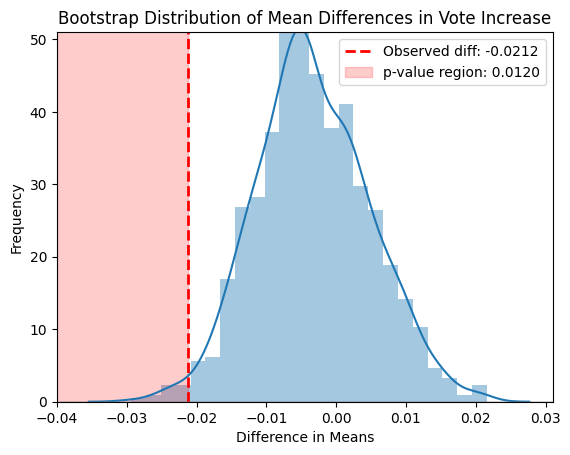

In [2651]:
# Perform bootstrap test to see if movies with these keywords have significantly lower vote increases
n_bootstrap = 1000
observed_diff = contain_keyword["vote_increase"].mean() - not_contain_keyword["vote_increase"].mean()
print(observed_diff)
# Bootstrap sampling
bootstrap_diffs = []
for _ in range(n_bootstrap):
    # Resample with replacement from each group
    #sample_with = np.random.choice(interested["vote_increase"], size=len(contain_keyword))
    sample_with = interested.sample(len(contain_keyword))["vote_increase"]
    sample_without = interested.drop(contain_keyword.index)["vote_increase"]
    
    # Calculate the difference in means for this bootstrap sample
    bootstrap_diff = np.mean(sample_with) - np.mean(sample_without)
    bootstrap_diffs.append(bootstrap_diff)

# Calculate p-value (proportion of bootstrap samples with difference >= observed_diff)
# For a one-sided test (less than), we count how many bootstrap differences are <= observed_diff
p_value = np.mean(np.array(bootstrap_diffs) <= observed_diff)


sns.distplot(bootstrap_diffs)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed diff: {observed_diff:.4f}')
plt.title('Bootstrap Distribution of Mean Differences in Vote Increase')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')

# Highlight the p-value area on the plot
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)  # Add a horizontal line at y=0 for reference

# Calculate the 5% threshold for highlighting
threshold_index = int(0.05 * len(bootstrap_diffs))
sorted_diffs = np.sort(bootstrap_diffs)
threshold_value = sorted_diffs[threshold_index]

# Highlight the area representing the p-value
plt.fill_between(
    np.linspace(-0.04, observed_diff, 100),
    0, 
    plt.gca().get_ylim()[1],
    color='red', 
    alpha=0.2,
    label=f'p-value region: {p_value:.4f}'
)

plt.xlim(-0.04)
plt.ylim(0,51)
plt.legend()



print(f"ผลการทดสอบ Bootstrap (n={n_bootstrap}):")
print(f"ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: {observed_diff:.4f}")
print(f"ที่ CI 95% สำหรับความแตกต่าง: [{np.percentile(bootstrap_diffs, 2.5):.4f}, {np.percentile(bootstrap_diffs, 97.5):.4f}]")
print(f"ค่า p-value (การทดสอบทางเดียว): {p_value:.6f}")

if p_value < ALPHA:
    print(f"ผลลัพธ์มีนัยสำคัญทางสถิติ (p < {ALPHA}).")
    print(f"ภาพยนตร์ที่มี keyword เหล่านี้มีการเพิ่มขึ้นของคะแนนโหวตต่ำกว่าภาพยนตร์ที่ไม่มี keyword เหล่านี้อย่างมีนัยสำคัญ")
    
    # Calculate the mean difference
    print(f"ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่มี keyword: {mean_with_keywords:.4f}")
    print(f"ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่ไม่มี keyword: {mean_without_keywords:.4f}")
    print(f"ความแตกต่าง: {pct:.4f}%")
else:
    print(f"ผลลัพธ์ไม่มีนัยสำคัญทางสถิติ (p >= {ALPHA}).")

0.13346354716556075


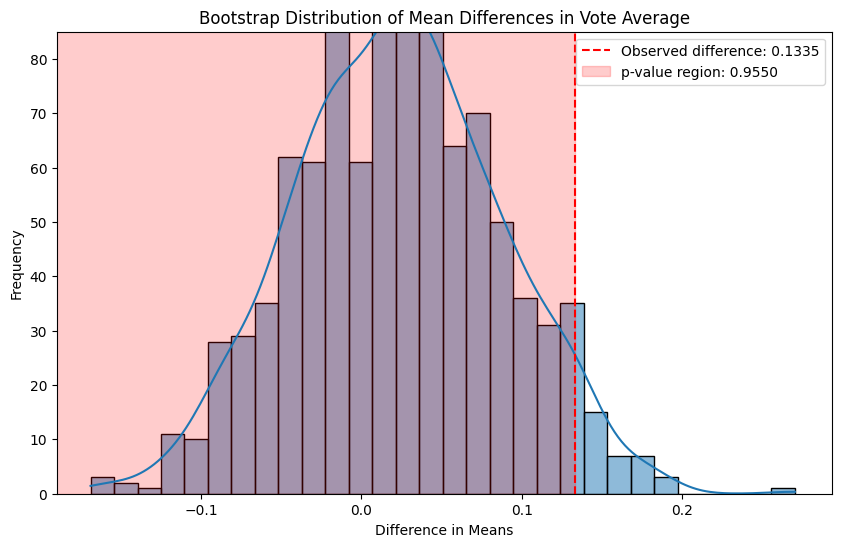

ผลการทดสอบ Bootstrap (n=1000):
ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: 0.1335
ที่ CI 95% สำหรับความแตกต่าง: [-0.0986, 0.1421]
ค่า p-value (การทดสอบทางเดียว): 0.955000
ผลลัพธ์ไม่มีนัยสำคัญทางสถิติ (p >= 0.05).
ยอมรับ H0 ว่า
คะแนนโหวตเฉลี่ยของหนังที่มี keyword เหล่านี้ไม่แตกต่างจากหนังที่ไม่มี keyword เหล่านี้


In [2652]:
n_bootstrap = 1000
observed_diff = contain_keyword["vote_average"].mean() - not_contain_keyword["vote_average"].mean()
print(observed_diff)
# Bootstrap sampling
bootstrap_diffs = []
for _ in range(n_bootstrap):
    sample_with = interested.sample(len(contain_keyword))["vote_average"]
    sample_without = interested.drop(contain_keyword.index)["vote_average"]

    bootstrap_diff = np.mean(sample_with) - np.mean(sample_without)
    bootstrap_diffs.append(bootstrap_diff)

p_value = np.mean(np.array(bootstrap_diffs) <= observed_diff)

# Calculate means for labeling
mean_with_keywords = contain_keyword["vote_average"].mean()
mean_without_keywords = not_contain_keyword["vote_average"].mean()
pct = (mean_with_keywords - mean_without_keywords) / mean_without_keywords * 100

# Visualize the bootstrap distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, bins=30, kde=True)
plt.axvline(observed_diff, color='red', linestyle='--', 
            label=f'Observed difference: {observed_diff:.4f}')

# Highlight the area representing the p-value
plt.fill_between(
    np.linspace(plt.gca().get_xlim()[0], observed_diff, 100),
    0, 
    plt.gca().get_ylim()[1],
    color='red', 
    alpha=0.2,
    label=f'p-value region: {p_value:.4f}'
)
plt.ylim(0,85)
plt.xlim(-0.19)
plt.title('Bootstrap Distribution of Mean Differences in Vote Average')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


print(f"ผลการทดสอบ Bootstrap (n={n_bootstrap}):")
print(f"ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: {observed_diff:.4f}")
print(f"ที่ CI 95% สำหรับความแตกต่าง: [{np.percentile(bootstrap_diffs, 2.5):.4f}, {np.percentile(bootstrap_diffs, 97.5):.4f}]")
print(f"ค่า p-value (การทดสอบทางเดียว): {p_value:.6f}")

if p_value < ALPHA:
    print(f"ผลลัพธ์มีนัยสำคัญทางสถิติ (p < {ALPHA}).")
    print(f"ภาพยนตร์ที่มีคำสำคัญเหล่านี้มีคะแนนโหวตต่ำกว่าภาพยนตร์ที่ไม่มี keyword เหล่านี้อย่างมีนัยสำคัญ")

    print(f"ค่าเฉลี่ยคะแนนโหวตที่มี keyword: {mean_with_keywords:.4f}")
    print(f"ค่าเฉลี่ยงคะแนนโหวตที่ไม่มี keyword: {mean_without_keywords:.4f}")
    print(f"ความแตกต่าง: {pct:.4f}%")
else:
    print(f"ผลลัพธ์ไม่มีนัยสำคัญทางสถิติ (p >= {ALPHA}).")
    print(f"ยอมรับ H0 ว่า")
    print("คะแนนโหวตเฉลี่ยของหนังที่มี keyword เหล่านี้ไม่แตกต่างจากหนังที่ไม่มี keyword เหล่านี้")

